In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from __future__ import print_function
import seaborn as sns
from matplotlib.ticker import NullFormatter, MaxNLocator
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import scipy as sp
from itertools import chain
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy import spatial
from scipy.spatial import ConvexHull
from scipy.optimize import curve_fit
from matplotlib import path
from scipy.stats import probplot,shapiro, sem
from scipy.interpolate import make_interp_spline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import cm
from numpy import linspace
import pylab
import os
from scipy.ndimage import gaussian_filter

# initialization steps

In [2]:
#protamine details
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for salmon
salmon_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/salmon_rg.csv").iloc[:,:3]
salmon_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/salmon_ree.csv")
salmon_rg_ree=pd.concat([salmon_rg,salmon_ree['Ree']],axis=1)
salmon_rg_ree=salmon_rg_ree[salmon_rg_ree.sim!=2]
salmon_rg_ree=salmon_rg_ree[salmon_rg_ree.sim!=11]
#this step is because some salmon simulations have more than 200ns
temp_df=salmon_rg_ree.copy()
for sim in temp_df.sim.unique():
    n=temp_df[temp_df.sim==sim].frames.max()-100000
    if n>0:
        temp_df.drop(temp_df[temp_df.sim==sim].tail(n).index,inplace=True)
salmon_rg_ree=temp_df.copy()
del temp_df
#this step is taking last 40000 frames i.e. equilibrated portion
blank_df = pd.DataFrame()
for sim in salmon_rg_ree.sim.unique():
    temp_df = salmon_rg_ree[salmon_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
salmon_rg_ree = blank_df.copy()
del blank_df
del temp_df
del salmon_rg, salmon_ree

#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for p1
p1_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/p1_rg.csv")
p1_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/p1_ree.csv")
p1_rg_ree=pd.concat([p1_rg,p1_ree['Ree']],axis=1)
p1_rg_ree=p1_rg_ree[p1_rg_ree.sim!=15]
p1_rg_ree=p1_rg_ree[p1_rg_ree.sim!=13]
blank_df = pd.DataFrame()
for sim in p1_rg_ree.sim.unique():
    temp_df = p1_rg_ree[p1_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_rg_ree = blank_df.copy()
del blank_df
del temp_df
del p1_rg, p1_ree

#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for bull
bull_rg = pd.read_csv("~/protamine_simulation/jupyter_nb/bull_Rg_master_out.csv")
bull_ree = pd.read_csv("~/protamine_simulation/jupyter_nb/bull_Ree_master_out.csv")
bull_rg_ree=pd.concat([bull_rg,bull_ree['Ree']],axis=1)
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=14]
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=15]
blank_df = pd.DataFrame()
for sim in bull_rg_ree.sim.unique():
    temp_df = bull_rg_ree[bull_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
bull_rg_ree = blank_df.copy()

del blank_df
del temp_df
del bull_rg, bull_ree

In [3]:
#human P1 protamine ESFF1 13 simulations
#drop the same trajectories as ff14sb 13 simulations
#use equilibrated region same region as ff14sb

p1_rg_esff1= pd.read_csv('/home/hshadman/protamine_simulation/ESFF1/protamine_human/P1/explicit_solvent/more_nosalt_runs/explicit_continued_from_implicit/Rg_Ree/p1_Rg_master_out.csv')
p1_ree_esff1= pd.read_csv('/home/hshadman/protamine_simulation/ESFF1/protamine_human/P1/explicit_solvent/more_nosalt_runs/explicit_continued_from_implicit/Rg_Ree/p1_Ree_master_out.csv')
p1_rg_ree_esff1=pd.concat([p1_rg_esff1,p1_ree_esff1['Ree']],axis=1)
p1_rg_ree_esff1=p1_rg_ree_esff1[p1_rg_ree_esff1.sim!=15]
p1_rg_ree_esff1=p1_rg_ree_esff1[p1_rg_ree_esff1.sim!=13]
blank_df = pd.DataFrame()
for sim in p1_rg_ree_esff1.sim.unique():
    temp_df = p1_rg_ree_esff1[p1_rg_ree_esff1.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_rg_ree_esff1 = blank_df.copy()
del blank_df
del temp_df
del p1_rg_esff1, p1_ree_esff1


In [4]:
#the long simulations 
salmon_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/salmon_Rg_eighth_oldff.csv')                                                                    
salmon_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/salmon_Ree_eighth_oldff.csv')                                                                  
salmon_rg_ree_oldff=pd.concat([salmon_rg_oldff,salmon_ree_oldff['Ree']],axis=1)                                                  
salmon_rg_ree_oldff['ratio']=salmon_rg_ree_oldff.Ree.values**2/salmon_rg_ree_oldff.Rg.values**2                                  

p1_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/p1_Rg_eighth_oldff.csv')                                                                    
p1_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/p1_Ree_eighth_oldff.csv')                                                                  
p1_rg_ree_oldff=pd.concat([p1_rg_oldff,p1_ree_oldff['Ree']],axis=1)                                                  
p1_rg_ree_oldff['ratio']=p1_rg_ree_oldff.Ree.values**2/p1_rg_ree_oldff.Rg.values**2                                  

bull_rg_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/bull_Rg_fourth_oldff.csv')                                                                    
bull_ree_oldff=pd.read_csv('~/protamine_simulation/jupyter_nb/bull_Ree_fourth_oldff.csv')                                                                  
bull_rg_ree_oldff=pd.concat([bull_rg_oldff,bull_ree_oldff['Ree']],axis=1)     
bull_rg_ree_oldff['ratio']=bull_rg_ree_oldff.Ree.values**2/bull_rg_ree_oldff.Rg.values**2                                  

#use below two dataframes for plotting                                                                               

del salmon_rg_oldff, salmon_ree_oldff,p1_rg_oldff, p1_ree_oldff, bull_rg_oldff, bull_ree_oldff
  

In [5]:
#protamine details (only for salmon dataframe i added Rg/Rg_mean)
salmon_rg_ree_ratheatmap=salmon_rg_ree.copy()
salmon_rg_ree_ratheatmap['ratio']=salmon_rg_ree_ratheatmap.Ree.values**2/salmon_rg_ree_ratheatmap.Rg.values**2
del salmon_rg_ree

test=salmon_rg_ree_ratheatmap.copy()

temp_rg_mean=test.Rg.mean()

test['Rg/Rg_mean']=test['Rg'].values/temp_rg_mean
salmon_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

In [6]:
#protamine details
p1_rg_ree_ratheatmap=p1_rg_ree.copy()
p1_rg_ree_ratheatmap['ratio']=p1_rg_ree_ratheatmap.Ree.values**2/p1_rg_ree_ratheatmap.Rg.values**2
del p1_rg_ree
p1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,28.1333,70.9610,6.362065
60001,60002,1,28.0252,71.5204,6.512720
60002,60003,1,28.0709,70.5204,6.311271
60003,60004,1,27.8865,69.2119,6.159898
60004,60005,1,27.9361,69.9112,6.262705
...,...,...,...,...,...
1399995,99996,14,23.9297,69.6266,8.465953
1399996,99997,14,23.8227,69.1996,8.437722
1399997,99998,14,23.6595,68.5624,8.397710
1399998,99999,14,23.7770,69.0513,8.433922


In [7]:
#protamine details
p1_rg_ree_esff1_ratheatmap=p1_rg_ree_esff1.copy()
p1_rg_ree_esff1_ratheatmap['ratio']=p1_rg_ree_esff1_ratheatmap.Ree.values**2/p1_rg_ree_esff1_ratheatmap.Rg.values**2
del p1_rg_ree_esff1
p1_rg_ree_esff1_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,30.0090,76.5885,6.513645
60001,60002,1,29.9954,76.3078,6.471852
60002,60003,1,30.0475,75.8204,6.367302
60003,60004,1,29.8249,77.0204,6.668890
60004,60005,1,30.1068,78.4066,6.782285
...,...,...,...,...,...
1399995,99996,14,31.3949,92.7101,8.720390
1399996,99997,14,31.3185,92.2405,8.674439
1399997,99998,14,31.5128,93.0468,8.718242
1399998,99999,14,31.5500,92.3367,8.565446


In [8]:
#protamine details
bull_rg_ree_ratheatmap=bull_rg_ree.copy()
bull_rg_ree_ratheatmap['ratio']=bull_rg_ree_ratheatmap.Ree.values**2/bull_rg_ree_ratheatmap.Rg.values**2
del bull_rg_ree
bull_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio
60000,60001,1,24.4750,55.0058,5.050933
60001,60002,1,24.5678,56.4126,5.272538
60002,60003,1,24.5493,56.1438,5.230285
60003,60004,1,24.8113,56.7690,5.235082
60004,60005,1,25.0404,57.1523,5.209366
...,...,...,...,...,...
1299995,99996,13,25.9520,62.3499,5.772047
1299996,99997,13,25.9814,62.1708,5.725953
1299997,99998,13,25.8608,61.9394,5.736541
1299998,99999,13,25.8253,62.1201,5.785935


In [9]:
#salmon tensors received and converted to moments at below directory. only equilibrated region for moments for time
salmon_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/salmon_moments_equilibrated.csv')
salmon_moments.insert(0,salmon_rg_ree_ratheatmap.columns[0],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[0]].values)
salmon_moments.insert(1,salmon_rg_ree_ratheatmap.columns[1],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[1]].values)
salmon_moments.insert(2,salmon_rg_ree_ratheatmap.columns[2],
                      salmon_rg_ree_ratheatmap[salmon_rg_ree_ratheatmap.columns[2]].values)
salmon_R1=salmon_moments.R1.values
salmon_R2=salmon_moments.R2.values
salmon_R3=salmon_moments.R3.values
salmon_Rg=(salmon_R1+salmon_R2+salmon_R3)**0.5
salmon_moments['asphericity']=(salmon_R1) - ((0.5) * ((salmon_R2) + (salmon_R3)))
salmon_moments['acylindricity']=(salmon_R2) - (salmon_R3)
salmon_moments['RSA'] = ((salmon_moments.asphericity.values**2) + (0.75*(salmon_moments.acylindricity.values**2)))/(salmon_Rg**4)
del salmon_R1, salmon_R2, salmon_R3, salmon_Rg


#p1 tensors received and converted to moments at below directory. only equilibrated region for moments for time
p1_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/p1_moments_equilibrated.csv')
p1_moments.insert(0,p1_rg_ree_ratheatmap.columns[0],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[0]].values)
p1_moments.insert(1,p1_rg_ree_ratheatmap.columns[1],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[1]].values)
p1_moments.insert(2,p1_rg_ree_ratheatmap.columns[2],
                      p1_rg_ree_ratheatmap[p1_rg_ree_ratheatmap.columns[2]].values)

p1_R1=p1_moments.R1.values
p1_R2=p1_moments.R2.values
p1_R3=p1_moments.R3.values
p1_Rg=(p1_R1+p1_R2+p1_R3)**0.5
p1_moments['asphericity']=(p1_R1) - ((0.5) * ((p1_R2) + (p1_R3)))
p1_moments['acylindricity']=(p1_R2) - (p1_R3)
p1_moments['RSA'] = ((p1_moments.asphericity.values**2) + (0.75*(p1_moments.acylindricity.values**2)))/(p1_Rg**4)
del p1_R1, p1_R2, p1_R3, p1_Rg


#bull tensors received and converted to moments at below directory. only equilibrated region for moments for time
bull_moments=pd.read_csv('/home/hshadman/protamine_simulation/jupyter_nb/bull_moments_equilibrated.csv')
bull_moments.insert(0,bull_rg_ree_ratheatmap.columns[0],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[0]].values)
bull_moments.insert(1,bull_rg_ree_ratheatmap.columns[1],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[1]].values)
bull_moments.insert(2,bull_rg_ree_ratheatmap.columns[2],
                      bull_rg_ree_ratheatmap[bull_rg_ree_ratheatmap.columns[2]].values)
bull_R1=bull_moments.R1.values
bull_R2=bull_moments.R2.values
bull_R3=bull_moments.R3.values
bull_Rg=(bull_R1+bull_R2+bull_R3)**0.5
bull_moments['asphericity']=(bull_R1) - ((0.5) * ((bull_R2) + (bull_R3)))
bull_moments['acylindricity']=(bull_R2) - (bull_R3)
bull_moments['RSA'] = ((bull_moments.asphericity.values**2) + (0.75*(bull_moments.acylindricity.values**2)))/(bull_Rg**4)
del bull_R1, bull_R2, bull_R3, bull_Rg



In [10]:
salmon_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,26.1041,639.320359,29.635872,12.468669,618.268089,17.167203,0.823699
1,60002,1,25.8683,628.822750,28.431834,11.914016,608.649825,16.517819,0.827759
2,60003,1,25.9168,632.701039,27.210635,11.768426,613.211508,15.442209,0.833877
3,60004,1,25.9136,633.831913,26.351048,11.333339,614.989720,15.017709,0.839106
4,60005,1,25.9379,633.155388,26.860646,12.756666,613.346732,14.103980,0.831472
...,...,...,...,...,...,...,...,...,...
519995,99996,15,18.5986,289.898603,42.690007,13.319490,261.893855,29.370517,0.578637
519996,99997,15,18.6897,291.742781,44.029569,13.533850,262.961071,30.495719,0.572439
519997,99998,15,18.7345,292.589463,45.065449,13.327688,263.392894,31.737762,0.569299
519998,99999,15,18.7678,294.566483,44.133938,13.530279,265.734375,30.603659,0.574831


In [11]:
bull_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,24.4750,553.782676,31.293834,13.947590,531.161964,17.346244,0.786887
1,60002,1,24.5678,557.928541,31.484898,14.161761,535.105212,17.323136,0.786605
2,60003,1,24.5493,559.257751,29.346161,14.062388,537.553476,15.283773,0.796073
3,60004,1,24.8113,573.322884,28.669697,13.608519,552.183776,15.061178,0.805028
4,60005,1,25.0404,583.352172,30.432837,13.236391,561.517558,17.196446,0.802541
...,...,...,...,...,...,...,...,...,...
519995,99996,13,25.9520,624.948670,33.652810,14.905619,600.669455,18.747191,0.795983
519996,99997,13,25.9814,625.943638,34.442536,14.644726,601.400006,19.797810,0.794387
519997,99998,13,25.8608,621.268264,32.649439,14.861297,597.512896,17.788142,0.798763
519998,99999,13,25.8253,621.982272,31.603657,13.361472,599.499707,18.242185,0.808530


In [12]:
p1_moments

,frames,sim,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,60001,1,28.1333,735.167983,44.158809,12.155908,707.010624,32.002900,0.799164
1,60002,1,28.0252,728.028439,45.307523,12.074138,699.337608,33.233384,0.794174
2,60003,1,28.0709,728.851449,46.731091,12.393260,699.289274,34.337831,0.788992
3,60004,1,27.8865,717.878466,47.014979,12.764155,687.988898,34.250824,0.784138
4,60005,1,27.9361,722.026616,45.983290,12.416294,692.826824,33.566996,0.789495
...,...,...,...,...,...,...,...,...,...
519995,99996,14,23.9297,539.608244,18.806862,14.217194,523.096216,4.589668,0.834520
519996,99997,14,23.8227,534.683491,17.852470,14.982840,518.265836,2.869630,0.833978
519997,99998,14,23.6595,527.254466,17.695328,14.819906,510.996850,2.875422,0.833351
519998,99999,14,23.7770,532.609284,17.569947,15.166769,516.240926,2.403179,0.833841


In [13]:
#BE CAREFUL with working directory for this first part of code
#-------
#only SAW_equil_chain_rg_ree was changed to SAW_SAW_equil_chain_rg_ree
# BE CAREFUL when changing the RW to SAW and RW
cwd= os.getcwd()
os.chdir('/home/hshadman/polym_sep/SAW/varying_chain_lengths/')
chain_lengths=[]
for file in os.listdir():
    if file.split('_')[0]=='chain':
        chain_lengths.append(int(file.split('_')[2]))
os.chdir(cwd)
#--------
folders=[]
chain_lengths=sorted(chain_lengths)
for i in chain_lengths:
    folders.append('/home/hshadman/polym_sep/SAW/varying_chain_lengths/chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    test=pd.read_csv(file)
    test['Rend2']=test.Rendx+test.Rendy+test.Rendz
    test['Rg2']=test.Rgx+test.Rgy+test.Rgz
    test['ratio']=test.Rend2.values/test.Rg2.values
    test['asphericity']=test.Rgx.values-(0.5*(test.Rgy.values+test.Rgz.values))
    test['acylindricity']=test.Rgy.values-test.Rgz.values
    test['RSA']=((test.asphericity.values**2+(0.75*test.acylindricity.values**2))/(test.Rg2.values)**2)**0.5

    epas_considered = test.epas.unique()
    blank_df = pd.DataFrame()
    for epas in test.epas.unique():
        if epas in epas_considered:
            frames_number=len(test[test.epas==epas].index)
            equil_frames=int(0.90*frames_number)
            temp_df = test[test.epas==epas].iloc[-equil_frames:,:]
            blank_df = blank_df.append(temp_df)
    equil_test=blank_df.copy()
    equil_test=equil_test.drop(['frames','econf'],axis=1)
    if j==0:
        SAW_equil_chain_rg_ree=equil_test.copy()
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_SAW=running_df.copy()
    else:
        SAW_equil_chain_rg_ree=SAW_equil_chain_rg_ree.append(equil_test)
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_SAW=pd.concat([summary_df_SAW,running_df],axis=0)    
    del blank_df, temp_df, test, equil_test    
    j+=1
del running_df, equil_frames
summary_df_SAW=summary_df_SAW.round({'epas':2})
SAW_equil_chain_rg_ree=SAW_equil_chain_rg_ree.round({'epas':2})


In [14]:
#BE CAREFUL with working directory for this first part of code
# extra snapshots for higher epas values in SAW chain length 100 
file='/home/hshadman/polym_sep/SAW/extra_snaps_chain_length_100/extra_snaps_100_master_out.csv'
j=0
test=pd.read_csv(file)
test['Rend2']=test.Rendx+test.Rendy+test.Rendz
test['Rg2']=test.Rgx+test.Rgy+test.Rgz
test['ratio']=test.Rend2.values/test.Rg2.values
test['asphericity']=test.Rgx.values-(0.5*(test.Rgy.values+test.Rgz.values))
test['acylindricity']=test.Rgy.values-test.Rgz.values
test['RSA']=((test.asphericity.values**2+(0.75*test.acylindricity.values**2))/(test.Rg2.values)**2)**0.5

epas_considered = test.epas.unique()
blank_df = pd.DataFrame()
for epas in test.epas.unique():
    for run in test[(test.epas==epas)].run_number.unique():
        if epas in epas_considered:
            frames_number=len(test[(test.epas==epas) & (test.run_number==run)].index)
            equil_frames=int(0.90*frames_number)
            temp_df = test[(test.epas==epas) & (test.run_number==run)].iloc[-equil_frames:,:]
            blank_df = blank_df.append(temp_df)
equil_test=blank_df.copy()
equil_test=equil_test.drop(['frames','econf'],axis=1)
SAW_ind_runs_chainlen100=equil_test.copy()
del blank_df, temp_df, test, equil_test    
j+=1


#adding previous snapshots from SAW_equil_chain_rg_ree in here as run_number 0

if SAW_ind_runs_chainlen100.chain_length.unique().shape[0]!=1:
    raise KeyboardInterrupt

ref_df=SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.chain_length==SAW_ind_runs_chainlen100.chain_length.unique()[0]].copy()
running_df=SAW_ind_runs_chainlen100.copy()
for epas in ref_df.epas.unique():
    temp_df = ref_df[ref_df.epas==epas]
    temp_df.insert(0,'run_number',np.repeat(0,temp_df.shape[0]))
    running_df = running_df.append(temp_df)
    del temp_df

SAW_ind_runs_chainlen100=running_df.copy()
SAW_ind_runs_chainlen100=SAW_ind_runs_chainlen100.round({'epas':2}).reset_index(drop=True)

del equil_frames, running_df, ref_df


In [15]:
#BE CAREFUL with working directory for this first part of code
#-------
#only RW_equil_chain_rg_ree was changed to RW_RW_equil_chain_rg_ree
# BE CAREFUL when changing the RW to SAW and RW
cwd= os.getcwd()
os.chdir('/home/hshadman/polym_sep/random_walk/varying_chain_lengths/')
chain_lengths=[]
for file in os.listdir():
    if file.split('_')[0]=='chain':
        chain_lengths.append(int(file.split('_')[2]))
os.chdir(cwd)
#--------
folders=[]
chain_lengths=sorted(chain_lengths)
for i in chain_lengths:
    folders.append('/home/hshadman/polym_sep/random_walk/varying_chain_lengths/chain_length_'+str(i)+'/varying_epas_chain_length_'+str(i)+'_master_out.csv')
j=0
for file in folders:
    test=pd.read_csv(file)
    test['Rend2']=test.Rendx+test.Rendy+test.Rendz
    test['Rg2']=test.Rgx+test.Rgy+test.Rgz
    test['ratio']=test.Rend2.values/test.Rg2.values
    test['asphericity']=test.Rgx.values-(0.5*(test.Rgy.values+test.Rgz.values))
    test['acylindricity']=test.Rgy.values-test.Rgz.values
    test['RSA']=((test.asphericity.values**2+(0.75*test.acylindricity.values**2))/(test.Rg2.values)**2)**0.5

    epas_considered = test.epas.unique()
    blank_df = pd.DataFrame()
    for epas in test.epas.unique():
        if epas in epas_considered:
            frames_number=len(test[test.epas==epas].index)
            equil_frames=int(0.90*frames_number)
            temp_df = test[test.epas==epas].iloc[-equil_frames:,:]
            blank_df = blank_df.append(temp_df)
    equil_test=blank_df.copy()
    equil_test=equil_test.drop(['frames','econf'],axis=1)
    if j==0:
        RW_equil_chain_rg_ree=equil_test.copy()
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_RW=running_df.copy()
    else:
        RW_equil_chain_rg_ree=RW_equil_chain_rg_ree.append(equil_test)
        for epas_val in equil_test.epas.unique():
            if epas_val==equil_test.epas.unique()[0]:
                running_df=pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T
            elif epas_val!=equil_test.epas.unique()[0]:
                running_df=running_df.append(pd.DataFrame(data=equil_test[equil_test.epas==epas_val].mean(axis=0)).T)            
        summary_df_RW=pd.concat([summary_df_RW,running_df],axis=0)    
    del blank_df, temp_df, test, equil_test    
    j+=1
del running_df, equil_frames
summary_df_RW=summary_df_RW.round({'epas':2})
RW_equil_chain_rg_ree=RW_equil_chain_rg_ree.round({'epas':2})


In [16]:
#PEI code
pei_ratheatmap=pd.read_csv("/home/hshadman/caleb_cyu1/jupyter_nb/pei_Rg_Ree_master_out.csv")
pei_ratheatmap['ratio']=pei_ratheatmap.Ree.values**2/pei_ratheatmap.Rg.values**2

test=pei_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.proton.unique():
    temp_rg_mean.append(list(np.repeat(test[test.proton==sim]['Rg'].mean(),
                                 test[test.proton==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

pei_ratheatmap=test.copy()
del test, temp_rg_mean

In [17]:
pei_ratheatmap

,frames,proton,frames2,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,0,1,8.3521,18.3635,4.834144,8.618204,0.969123
1,2,0,2,8.4664,18.7833,4.922052,8.618204,0.982386
2,3,0,3,8.5173,18.8147,4.879673,8.618204,0.988292
3,4,0,4,8.7129,20.7722,5.683810,8.618204,1.010988
4,5,0,5,8.6367,19.4532,5.073252,8.618204,1.002146
...,...,...,...,...,...,...,...,...
405004,44997,40,44997,28.6018,79.4041,7.707244,31.801804,0.899377
405005,44998,40,44998,28.6281,80.9322,7.992040,31.801804,0.900204
405006,44999,40,44999,28.6173,80.9547,8.002521,31.801804,0.899864
405007,45000,40,45000,28.4727,80.3615,7.965972,31.801804,0.895317


# formula from 2012 macromolecules elder jayaraman paper
$$
asphericity=(R_1)-\frac{1}{2}(R_2+R_3) \\  
acylindricity=(R_2-R_3) \\
RSA=\frac{asphericity^2 + 0.75acylindricity^2}{R_g^4}
$$

In [18]:
#double check RSA definitions!!! (have been double checked)
pei_moments=pd.read_csv("/home/hshadman/caleb_cyu1/jupyter_nb/pei_moments.csv")
pei_tensor=pd.read_csv("/home/hshadman/caleb_cyu1/pei_tensor/pei_tensor_master_out.csv")
pei_moments.insert(0,pei_tensor.columns[0],pei_tensor[pei_tensor.columns[0]])
pei_moments.insert(1,pei_tensor.columns[1],pei_tensor[pei_tensor.columns[1]])
pei_moments.insert(2,pei_tensor.columns[2],pei_tensor[pei_tensor.columns[2]])
pei_R1=pei_moments.R1.values
pei_R2=pei_moments.R2.values
pei_R3=pei_moments.R3.values
pei_Rg=pei_moments.Rg.values
pei_moments['asphericity']=(pei_R1) - ((0.5) * ((pei_R2) + (pei_R3)))
pei_moments['acylindricity']=(pei_R2) - (pei_R3)
pei_moments['RSA'] = ((pei_moments.asphericity.values**2) + (0.75*(pei_moments.acylindricity.values**2)))/(pei_Rg**4)
del pei_tensor, pei_R1, pei_R2, pei_R3, pei_Rg
pei_moments


,frames,proton,Rg,R1,R2,R3,asphericity,acylindricity,RSA
0,1,0,8.3521,43.587836,16.815992,9.353872,30.502903,7.462120,0.199787
1,2,0,8.4664,46.554398,16.365420,8.759282,33.992047,7.606138,0.233329
2,3,0,8.5173,47.152627,16.082634,9.308639,34.456990,6.773995,0.232144
3,4,0,8.7129,50.970942,16.874182,8.068876,38.499413,8.805307,0.267282
4,5,0,8.6367,49.849475,16.940788,7.803137,37.477512,9.137651,0.263690
...,...,...,...,...,...,...,...,...,...
405004,19996,40,28.6018,700.224361,90.760200,27.081239,641.303641,63.678961,0.619090
405005,19997,40,28.6281,701.198069,89.147883,29.223248,642.012503,59.924635,0.617654
405006,19998,40,28.6173,701.951787,88.007303,28.990510,643.452881,59.016794,0.621227
405007,19999,40,28.4727,694.876275,90.961365,24.857160,636.967013,66.104205,0.622319


In [19]:
(pei_moments.R1+pei_moments.R2+pei_moments.R3)**0.5

0          8.352108
1          8.466351
2          8.517271
3          8.712864
4          8.636747
            ...    
405004    28.601850
405005    28.628119
405006    28.617295
405007    28.472703
405008    28.210705
Length: 405009, dtype: float64

In [20]:
#GW_ind_runs_chainlen25 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_25_6_runs.csv')
GW_ind_runs_chainlen100 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_2 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/2nd_time_gaussian_single_chain_length_100_9_runs.csv')
GW_ind_runs_chainlen100_3 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/3rd_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_4 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/4th_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_5 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/5th_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_6 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/6th_time_gaussian_single_chain_length_100_6_runs.csv')
GW_ind_runs_chainlen100_7 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/7th_time_gaussian_single_chain_length_100_15_runs.csv')
GW_ind_runs_chainlen100_8 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/8th_time_gaussian_single_chain_length_100_10_runs.csv')
#GW_ind_runs_chainlen150 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_single_chain_length_150_6_runs.csv')

#add rg/rg_mean column for each dataframe saved

#first the GW_ind_runs_chainlen25 (2 instances of dataframe in each chunk)
# test=GW_ind_runs_chainlen25.copy()
# test['Rg']=test.Rg2.values**0.5
# temp_rg_mean=[]
# for run_num in test.run_number.unique():
#     temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
#                                  test[test.run_number==run_num]['Rg'].shape[0])))

# test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
# test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

# GW_ind_runs_chainlen25=test.copy()
# del test, temp_rg_mean

#second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen100=test.copy()
del test

#second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_2.copy()
test['Rg']=test.Rg2.values**0.5
GW_ind_runs_chainlen100_2=test.copy()
del test
#second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_3.copy()
test['Rg']=test.Rg2.values**0.5
GW_ind_runs_chainlen100_3=test.copy()
del test
#second second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_4.copy()
test['Rg']=test.Rg2.values**0.5
GW_ind_runs_chainlen100_4=test.copy()
del test

#second second second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_5.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen100_5=test.copy()
del test
#second second second second second second the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_6.copy()
test['Rg']=test.Rg2.values**0.5
GW_ind_runs_chainlen100_6=test.copy()
del test
#seventh the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_7.copy()
test['Rg']=test.Rg2.values**0.5
GW_ind_runs_chainlen100_7=test.copy()
del test
#eighth the GW_ind_runs_chainlen100 (2 instances of dataframe in each chunk)
test=GW_ind_runs_chainlen100_8.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen100_8=test.copy()
del test



#update run number in second  and 3rd and 4th dataframes of chain length 100
GW_ind_runs_chainlen100_2['run_number']= GW_ind_runs_chainlen100_2['run_number'] + GW_ind_runs_chainlen100['run_number'].max()
GW_ind_runs_chainlen100_3['run_number']= GW_ind_runs_chainlen100_3['run_number'] + GW_ind_runs_chainlen100_2['run_number'].max()
GW_ind_runs_chainlen100_4['run_number']= GW_ind_runs_chainlen100_4['run_number'] + GW_ind_runs_chainlen100_3['run_number'].max()
GW_ind_runs_chainlen100_5['run_number']= GW_ind_runs_chainlen100_5['run_number'] + GW_ind_runs_chainlen100_4['run_number'].max()
GW_ind_runs_chainlen100_6['run_number']= GW_ind_runs_chainlen100_6['run_number'] + GW_ind_runs_chainlen100_5['run_number'].max()
GW_ind_runs_chainlen100_7['run_number']= GW_ind_runs_chainlen100_7['run_number'] + GW_ind_runs_chainlen100_6['run_number'].max()
GW_ind_runs_chainlen100_8['run_number']= GW_ind_runs_chainlen100_8['run_number'] + GW_ind_runs_chainlen100_7['run_number'].max()
#combine the three dataframes
GW_ind_runs_chainlen100 = pd.concat([GW_ind_runs_chainlen100,
                                     GW_ind_runs_chainlen100_2,
                                    GW_ind_runs_chainlen100_3,
                                    GW_ind_runs_chainlen100_4,
                                    GW_ind_runs_chainlen100_5,
                                    GW_ind_runs_chainlen100_6,
                                    GW_ind_runs_chainlen100_7,
                                    GW_ind_runs_chainlen100_8],axis=0)

no_of_runs_reference=24
#GETTING mean ONLY of 24 runs
GW_ind_runs_chainlen100['Rg/Rg_mean']=GW_ind_runs_chainlen100.Rg.values/GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=no_of_runs_reference].Rg.values.mean()
del GW_ind_runs_chainlen100_2,GW_ind_runs_chainlen100_3,GW_ind_runs_chainlen100_4,GW_ind_runs_chainlen100_5,GW_ind_runs_chainlen100_6,GW_ind_runs_chainlen100_7,GW_ind_runs_chainlen100_8



#third the GW_ind_runs_chainlen150 (2 instances of dataframe in each chunk)
# test=GW_ind_runs_chainlen150.copy()
# test['Rg']=test.Rg2.values**0.5
# temp_rg_mean=[]
# for run_num in test.run_number.unique():
#     temp_rg_mean.append(list(np.repeat(test[test.run_number==run_num]['Rg'].mean(),
#                                  test[test.run_number==run_num]['Rg'].shape[0])))

# test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
# test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

# GW_ind_runs_chainlen150=test.copy()
# del test, temp_rg_mean



In [21]:
GW_ind_runs_chainlen200 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/reviewer_gaussian_chain_length_200_30000_64runs.csv')
GW_ind_runs_chainlen300 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/reviewer_gaussian_chain_length_300_30000_64runs.csv')
GW_ind_runs_chainlen500 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/reviewer_gaussian_chain_length_500_30000_67runs.csv')
GW_ind_runs_chainlen1000 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/reviewer_gaussian_chain_length_1000_30000_67runs.csv')
GW_ind_runs_chainlen3000 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/reviewer_gaussian_chain_length_3000_30000_64runs.csv')
GW_ind_runs_chainlen5000 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/reviewer_gaussian_chain_length_5000_30000_64runs.csv')
GW_ind_runs_chainlen7000 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/reviewer_gaussian_chain_length_7000_30000_64runs.csv')
GW_ind_runs_chainlen10000 = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/reviewer_gaussian_chain_length_10000_30000_64runs.csv')

#get Rg values from Rg2 (for chain length 200)
test=GW_ind_runs_chainlen200.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen200=test.copy()
del test

#get Rg values from Rg2 (for chain length 300)
test=GW_ind_runs_chainlen300.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen300=test.copy()
del test

#get Rg values from Rg2 (for chain length 500)
test=GW_ind_runs_chainlen500.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen500=test.copy()
del test

#get Rg values from Rg2 (for chain length 1000)
test=GW_ind_runs_chainlen1000.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen1000=test.copy()
del test

#get Rg values from Rg2 (for chain length 3000)
test=GW_ind_runs_chainlen3000.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen3000=test.copy()
del test

#get Rg values from Rg2 (for chain length 5000)
test=GW_ind_runs_chainlen5000.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen5000=test.copy()
del test

#get Rg values from Rg2 (for chain length 7000)
test=GW_ind_runs_chainlen7000.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen7000=test.copy()
del test

#get Rg values from Rg2 (for chain length 10000)
test=GW_ind_runs_chainlen10000.copy()
test['Rg']=test.Rg2.values**0.5

GW_ind_runs_chainlen10000=test.copy()
del test


#GETTING mean ONLY of 24 runs (just like with chain length 100)
no_of_runs_reference=24
GW_ind_runs_chainlen200['Rg/Rg_mean']=GW_ind_runs_chainlen200.Rg.values/GW_ind_runs_chainlen200[GW_ind_runs_chainlen200.run_number<=no_of_runs_reference].Rg.values.mean()
GW_ind_runs_chainlen300['Rg/Rg_mean']=GW_ind_runs_chainlen300.Rg.values/GW_ind_runs_chainlen300[GW_ind_runs_chainlen300.run_number<=no_of_runs_reference].Rg.values.mean()
GW_ind_runs_chainlen500['Rg/Rg_mean']=GW_ind_runs_chainlen500.Rg.values/GW_ind_runs_chainlen500[GW_ind_runs_chainlen500.run_number<=no_of_runs_reference].Rg.values.mean()
GW_ind_runs_chainlen1000['Rg/Rg_mean']=GW_ind_runs_chainlen1000.Rg.values/GW_ind_runs_chainlen1000[GW_ind_runs_chainlen1000.run_number<=no_of_runs_reference].Rg.values.mean()
GW_ind_runs_chainlen3000['Rg/Rg_mean']=GW_ind_runs_chainlen3000.Rg.values/GW_ind_runs_chainlen3000[GW_ind_runs_chainlen3000.run_number<=no_of_runs_reference].Rg.values.mean()
GW_ind_runs_chainlen5000['Rg/Rg_mean']=GW_ind_runs_chainlen5000.Rg.values/GW_ind_runs_chainlen5000[GW_ind_runs_chainlen5000.run_number<=no_of_runs_reference].Rg.values.mean()
GW_ind_runs_chainlen7000['Rg/Rg_mean']=GW_ind_runs_chainlen7000.Rg.values/GW_ind_runs_chainlen7000[GW_ind_runs_chainlen7000.run_number<=no_of_runs_reference].Rg.values.mean()
GW_ind_runs_chainlen10000['Rg/Rg_mean']=GW_ind_runs_chainlen10000.Rg.values/GW_ind_runs_chainlen10000[GW_ind_runs_chainlen10000.run_number<=no_of_runs_reference].Rg.values.mean()

#the total number of snapshots in some of the chain lengths (1000, 500) was more than the total snapshots for 100
#so i am going to chop off some snapshots from all of these dataframes with extra snapshots
#chainlength 100 is my reference

no_ofRUNS_total_chainlen100 = GW_ind_runs_chainlen100.run_number.max()

#chain length 500, 1000 have more than 1920000 snapshots so i will reduce that for them
GW_ind_runs_chainlen500 = GW_ind_runs_chainlen500[GW_ind_runs_chainlen500.run_number<=no_ofRUNS_total_chainlen100].copy()
GW_ind_runs_chainlen1000 = GW_ind_runs_chainlen1000[GW_ind_runs_chainlen1000.run_number<=no_ofRUNS_total_chainlen100].copy()

del no_ofRUNS_total_chainlen100


In [22]:
#adding one extra cell, for GW_ind_runs_chainlen100 ONLY, calculating RSA for this data ONLY
GW_moments_ind_runs_100_=GW_ind_runs_chainlen100.copy()
GW_R1=GW_moments_ind_runs_100_.R1.values
GW_R2=GW_moments_ind_runs_100_.R2.values
GW_R3=GW_moments_ind_runs_100_.R3.values
GW_Rg=GW_moments_ind_runs_100_.Rg2.values**0.5
GW_moments_ind_runs_100_['asphericity']=(GW_R1) - ((0.5) * ((GW_R2) + (GW_R3)))
GW_moments_ind_runs_100_['acylindricity']=(GW_R2) - (GW_R3)
GW_moments_ind_runs_100_['RSA'] = ((GW_moments_ind_runs_100_.asphericity.values**2) + (0.75*(GW_moments_ind_runs_100_.acylindricity.values**2)))/(GW_Rg**4)
del GW_R1, GW_R2, GW_R3, GW_Rg


In [23]:
GW_equil_chain_rg_ree = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_chain_master_out.csv')[['chain_length','Rg2','Rend2','ratio']]
GW_moments = pd.read_csv('/home/hshadman/polym_sep/gaussian_chain/code/gaussian_chain_master_out.csv')[['chain_length','Rg2','R1','R2','R3','asphericity','acylindricity','RSA']]
#GW_moments already has asphericity, acylindricity and RSA from csv file but we are replacing that and recalcualting

GW_R1=GW_moments.R1.values
GW_R2=GW_moments.R2.values
GW_R3=GW_moments.R3.values
GW_Rg=GW_moments.Rg2.values**0.5
GW_moments['asphericity']=(GW_R1) - ((0.5) * ((GW_R2) + (GW_R3)))
GW_moments['acylindricity']=(GW_R2) - (GW_R3)
GW_moments['RSA'] = ((GW_moments.asphericity.values**2) + (0.75*(GW_moments.acylindricity.values**2)))/(GW_Rg**4)
del GW_R1, GW_R2, GW_R3, GW_Rg



In [24]:
GW_moments

,chain_length,Rg2,R1,R2,R3,asphericity,acylindricity,RSA
0,25,7.616056,4.155140,2.723211,0.737705,2.424682,1.985506,0.152329
1,25,20.551210,14.695473,5.157975,0.697762,11.767605,4.460213,0.363196
2,25,9.356418,7.070639,1.706749,0.579030,5.927750,1.127718,0.412280
3,25,11.953089,6.314056,3.872324,1.766708,3.494540,2.105616,0.108745
4,25,9.817060,5.874690,3.032098,0.910272,3.903505,2.121826,0.193142
...,...,...,...,...,...,...,...,...
179995,150,44.698413,31.292708,9.880317,3.525389,24.589855,6.354928,0.317801
179996,150,60.146050,39.848506,15.352877,4.944666,29.699735,10.408211,0.266292
179997,150,150.051747,101.269815,41.461426,7.320506,76.878850,34.140920,0.301328
179998,150,35.779590,22.420734,7.826252,5.532605,15.741305,2.293647,0.196640


In [25]:
#adding a column of Rg/Rg_mean for GW ONLY
#careful about changing anything here
#only GW don't do this for RW and SAW having epas and chainlength complicates things
test=GW_equil_chain_rg_ree.copy()
test['Rg']=test.Rg2.values**0.5
temp_rg_mean=[]
for chain_length in test.chain_length.unique():
    temp_rg_mean.append(list(np.repeat(test[test.chain_length==chain_length]['Rg'].mean(),
                                 test[test.chain_length==chain_length]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

GW_equil_chain_rg_ree=test.copy()
del test, temp_rg_mean


In [26]:
#ab40_ff14SB (disordered)
#CAREFUL if using frame numbers -- they repeat
ab40_ff14sb_rg_noimage = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Rg_noimage_master_out.csv")
ab40_ff14sb_ree_noimage = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Ree_noimage_master_out.csv")
ab40_ff14sb_rg_ree_ratheatmap_noimage = pd.concat([ab40_ff14sb_rg_noimage.frames,
                                           ab40_ff14sb_rg_noimage.sim,
                                          ab40_ff14sb_rg_noimage.Rg,
                                          ab40_ff14sb_ree_noimage.Ree],axis=1)
ab40_ff14sb_rg_ree_ratheatmap_noimage['ratio']=ab40_ff14sb_rg_ree_ratheatmap_noimage.Ree**2/ab40_ff14sb_rg_ree_ratheatmap_noimage.Rg**2


del ab40_ff14sb_rg_noimage, ab40_ff14sb_ree_noimage


In [27]:
ab40_ff14sb_rg_ree_ratheatmap_noimage

,frames,sim,Rg,Ree,ratio
0,1,1,12.2309,25.2003,4.245165
1,2,1,11.9942,25.3262,4.458590
2,3,1,11.9456,24.6764,4.267246
3,4,1,11.9716,24.7641,4.278984
4,5,1,12.2128,25.6045,4.395437
...,...,...,...,...,...
199995,39996,5,12.4342,20.5347,2.727351
199996,39997,5,12.3406,20.5174,2.764217
199997,39998,5,12.2176,19.9619,2.669512
199998,39999,5,12.3548,20.9697,2.880799


In [28]:
ab40_ff14sb_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/ab40_ff14sb_rg_noimage_moments.csv")

ab40_ff14sb_R1=ab40_ff14sb_moments.R1.values
ab40_ff14sb_R2=ab40_ff14sb_moments.R2.values
ab40_ff14sb_R3=ab40_ff14sb_moments.R3.values
ab40_ff14sb_Rg=(ab40_ff14sb_R1+ab40_ff14sb_R2+ab40_ff14sb_R3)**0.5
ab40_ff14sb_moments['asphericity']=(ab40_ff14sb_R1) - ((0.5) * ((ab40_ff14sb_R2) + (ab40_ff14sb_R3)))
ab40_ff14sb_moments['acylindricity']=(ab40_ff14sb_R2) - (ab40_ff14sb_R3)
ab40_ff14sb_moments['RSA'] = ((ab40_ff14sb_moments.asphericity.values**2) + (0.75*(ab40_ff14sb_moments.acylindricity.values**2)))/(ab40_ff14sb_Rg**4)
del ab40_ff14sb_R1, ab40_ff14sb_R2, ab40_ff14sb_R3, ab40_ff14sb_Rg
ab40_ff14sb_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,108.163394,28.598870,12.832136,87.447891,15.766733,0.350049
1,99.977841,30.253739,13.628420,78.036762,16.625319,0.304268
2,98.480565,31.956191,12.260544,76.372197,19.695646,0.300732
3,98.891280,31.667996,12.759424,76.677570,18.908571,0.299295
4,104.203416,31.735670,13.213314,81.728925,18.522356,0.311822
...,...,...,...,...,...,...
199995,99.980683,36.325014,18.304703,72.665824,18.020310,0.231082
199996,97.025701,37.254428,18.009670,69.393652,19.244758,0.219611
199997,97.902568,34.686889,16.681042,72.218602,18.005847,0.244985
199998,97.473301,37.110322,18.058277,69.889002,19.052046,0.221322


In [29]:
#ab40_ff14SB (disordered)
#CAREFUO if using frame numbers -- they repeat
# ab40_ff14sb_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Rg_master_out.csv")
# ab40_ff14sb_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ab40-ff14SB/analysis/Rg_ree_data/ab40_ff14SB_Ree_master_out.csv")
# ab40_ff14sb_rg_ree_ratheatmap = pd.concat([ab40_ff14sb_rg.frames,
#                                            ab40_ff14sb_rg.sim,
#                                           ab40_ff14sb_rg.Rg,
#                                           ab40_ff14sb_ree.Ree],axis=1)
# ab40_ff14sb_rg_ree_ratheatmap['ratio']=ab40_ff14sb_rg_ree_ratheatmap.Ree**2/ab40_ff14sb_rg_ree_ratheatmap.Rg**2

# test=ab40_ff14sb_rg_ree_ratheatmap.copy()

# temp_rg_mean=[]
# for sim in test.sim.unique():
#     temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
#                                  test[test.sim==sim]['Rg'].shape[0])))
    
# test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
# test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

# ab40_ff14sb_rg_ree_ratheatmap=test.copy()
# del test, temp_rg_mean

# del ab40_ff14sb_rg, ab40_ff14sb_ree


In [30]:
#ab40_ff14sb_rg_ree_ratheatmap

In [31]:
#tauF4_esff1 (disordered)
#CAREFUO if using frame numbers -- they repeat
tauF4_esff1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/tauF4-ESFF1/analysis/Rg_ree_data/tauF4_ESFF1_Rg_master_out.csv")
tauF4_esff1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/tauF4-ESFF1/analysis/Rg_ree_data/tauF4_ESFF1_Ree_master_out.csv")
tauF4_esff1_rg_ree_ratheatmap = pd.concat([tauF4_esff1_rg.frames,
                                           tauF4_esff1_rg.sim,
                                          tauF4_esff1_rg.Rg,
                                          tauF4_esff1_ree.Ree],axis=1)
tauF4_esff1_rg_ree_ratheatmap['ratio']=tauF4_esff1_rg_ree_ratheatmap.Ree**2/tauF4_esff1_rg_ree_ratheatmap.Rg**2


del tauF4_esff1_rg, tauF4_esff1_ree


In [32]:
tauF4_esff1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio
0,1,1,16.4798,29.6300,3.232656
1,2,1,16.0673,28.4535,3.136069
2,3,1,15.8874,28.8718,3.302494
3,4,1,15.7602,27.3359,3.008454
4,5,1,15.8364,28.3850,3.212661
...,...,...,...,...,...
199995,39996,5,17.4372,37.0009,4.502680
199996,39997,5,17.3952,35.7406,4.221481
199997,39998,5,17.3929,36.0978,4.307422
199998,39999,5,17.2742,35.2772,4.170540


In [33]:
tauF4_esff1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/tauF4_esff1_rg_moments.csv")

tauF4_esff1_R1=tauF4_esff1_moments.R1.values
tauF4_esff1_R2=tauF4_esff1_moments.R2.values
tauF4_esff1_R3=tauF4_esff1_moments.R3.values
tauF4_esff1_Rg=(tauF4_esff1_R1+tauF4_esff1_R2+tauF4_esff1_R3)**0.5
tauF4_esff1_moments['asphericity']=(tauF4_esff1_R1) - ((0.5) * ((tauF4_esff1_R2) + (tauF4_esff1_R3)))
tauF4_esff1_moments['acylindricity']=(tauF4_esff1_R2) - (tauF4_esff1_R3)
tauF4_esff1_moments['RSA'] = ((tauF4_esff1_moments.asphericity.values**2) + (0.75*(tauF4_esff1_moments.acylindricity.values**2)))/(tauF4_esff1_Rg**4)
del tauF4_esff1_R1, tauF4_esff1_R2, tauF4_esff1_R3, tauF4_esff1_Rg
tauF4_esff1_moments



,R1,R2,R3,asphericity,acylindricity,RSA
0,120.762362,86.072554,64.749484,45.351343,21.323071,0.032508
1,115.494788,78.041528,64.622984,44.162532,13.418543,0.031290
2,111.777377,77.055724,63.577399,41.460815,13.478324,0.029120
3,110.267378,75.410829,62.705192,41.209368,12.705637,0.029489
4,108.881196,77.133726,64.775778,37.926444,12.357948,0.024691
...,...,...,...,...,...,...
199995,166.179066,94.271783,43.606251,97.240049,50.665532,0.123102
199996,164.340012,94.312021,43.939467,95.214268,50.372554,0.119797
199997,166.730976,91.496642,44.286782,98.839264,47.209860,0.125015
199998,163.434269,90.857205,44.107426,95.951954,46.749779,0.121807


In [34]:
#FKBP12_ESFF1 (ordered)

FKBP12_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/FKBP12/FKBP12/ESFFx/analysis/Rg_ree_data/FKBP12_ESFF1_Rg_master_out.csv")
FKBP12_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/FKBP12/FKBP12/ESFFx/analysis/Rg_ree_data/FKBP12_ESFF1_Ree_master_out.csv")
FKBP12_ESFF1_rg_ree_ratheatmap = pd.concat([FKBP12_ESFF1_rg.frames,
                                           FKBP12_ESFF1_rg.sim,
                                          FKBP12_ESFF1_rg.Rg,
                                          FKBP12_ESFF1_ree.Ree],axis=1)
FKBP12_ESFF1_rg_ree_ratheatmap['ratio']=FKBP12_ESFF1_rg_ree_ratheatmap.Ree**2/FKBP12_ESFF1_rg_ree_ratheatmap.Rg**2
test=FKBP12_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

FKBP12_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del FKBP12_ESFF1_rg, FKBP12_ESFF1_ree


In [35]:
FKBP12_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,13.3880,26.7543,3.993519,13.426154,0.997158
1,2,1,13.3526,26.4652,3.928427,13.426154,0.994522
2,3,1,13.4281,27.2349,4.113604,13.426154,1.000145
3,4,1,13.4060,26.4477,3.892041,13.426154,0.998499
4,5,1,13.4169,27.0957,4.078462,13.426154,0.999311
...,...,...,...,...,...,...,...
199995,199996,1,13.5026,27.4264,4.125749,13.426154,1.005694
199996,199997,1,13.5716,27.6689,4.156442,13.426154,1.010833
199997,199998,1,13.5167,27.5963,4.168313,13.426154,1.006744
199998,199999,1,13.5561,26.7487,3.893461,13.426154,1.009679


In [36]:
FKBP12_ESFF1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/FKBP12_ESFF1_rg_moments.csv")

FKBP12_ESFF1_R1=FKBP12_ESFF1_moments.R1.values
FKBP12_ESFF1_R2=FKBP12_ESFF1_moments.R2.values
FKBP12_ESFF1_R3=FKBP12_ESFF1_moments.R3.values
FKBP12_ESFF1_Rg=(FKBP12_ESFF1_R1+FKBP12_ESFF1_R2+FKBP12_ESFF1_R3)**0.5
FKBP12_ESFF1_moments['asphericity']=(FKBP12_ESFF1_R1) - ((0.5) * ((FKBP12_ESFF1_R2) + (FKBP12_ESFF1_R3)))
FKBP12_ESFF1_moments['acylindricity']=(FKBP12_ESFF1_R2) - (FKBP12_ESFF1_R3)
FKBP12_ESFF1_moments['RSA'] = ((FKBP12_ESFF1_moments.asphericity.values**2) + (0.75*(FKBP12_ESFF1_moments.acylindricity.values**2)))/(FKBP12_ESFF1_Rg**4)
del FKBP12_ESFF1_R1, FKBP12_ESFF1_R2, FKBP12_ESFF1_R3, FKBP12_ESFF1_Rg
FKBP12_ESFF1_moments



,R1,R2,R3,asphericity,acylindricity,RSA
0,93.681086,46.348295,39.210419,50.901730,7.137876,0.081838
1,94.192770,46.109966,37.989964,52.142805,8.120002,0.087086
2,95.439483,45.623876,39.251241,53.001924,6.372635,0.087338
3,94.049882,47.818586,37.853532,51.213822,9.965053,0.083509
4,95.796869,46.141750,38.073281,53.689353,8.068470,0.090462
...,...,...,...,...,...,...
199995,96.552232,46.365562,39.402706,53.668098,6.962856,0.087742
199996,98.722621,45.922515,39.544264,55.989232,6.378252,0.093301
199997,97.184875,46.946601,38.569424,54.426862,8.377176,0.090322
199998,97.717278,46.056523,39.992799,54.692616,6.063724,0.089394


In [37]:
#ubiquitin_ESFF1 (ordered)

ubiquitin_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ubiquitin-ESFF1/combined_traj1/Rg_ree_data/ubiquitin_ESFF1_Rg_master_out.csv")
ubiquitin_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/ubiquitin-ESFF1/combined_traj1/Rg_ree_data/ubiquitin_ESFF1_Ree_master_out.csv")
ubiquitin_ESFF1_rg_ree_ratheatmap = pd.concat([ubiquitin_ESFF1_rg.frames,
                                           ubiquitin_ESFF1_rg.sim,
                                          ubiquitin_ESFF1_rg.Rg,
                                          ubiquitin_ESFF1_ree.Ree],axis=1)
ubiquitin_ESFF1_rg_ree_ratheatmap['ratio']=ubiquitin_ESFF1_rg_ree_ratheatmap.Ree**2/ubiquitin_ESFF1_rg_ree_ratheatmap.Rg**2

test=ubiquitin_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

ubiquitin_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del ubiquitin_ESFF1_rg, ubiquitin_ESFF1_ree


In [38]:
ubiquitin_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,11.8936,37.8846,10.146091,11.747149,1.012467
1,2,1,11.7568,37.0643,9.938786,11.747149,1.000822
2,3,1,11.8794,36.7918,9.592086,11.747149,1.011258
3,4,1,11.8375,38.0025,10.306337,11.747149,1.007691
4,5,1,11.8705,37.6894,10.080926,11.747149,1.010501
...,...,...,...,...,...,...,...
199995,199996,1,11.5105,26.8009,5.421387,11.747149,0.979855
199996,199997,1,11.4707,26.8702,5.487341,11.747149,0.976467
199997,199998,1,11.4318,26.4976,5.372592,11.747149,0.973155
199998,199999,1,11.3728,26.0578,5.249775,11.747149,0.968133


In [39]:
ubiquitin_ESFF1_moments= pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/ubiquitin_ESFF1_rg_moments.csv")

ubiquitin_ESFF1_R1=ubiquitin_ESFF1_moments.R1.values
ubiquitin_ESFF1_R2=ubiquitin_ESFF1_moments.R2.values
ubiquitin_ESFF1_R3=ubiquitin_ESFF1_moments.R3.values
ubiquitin_ESFF1_Rg=(ubiquitin_ESFF1_R1+ubiquitin_ESFF1_R2+ubiquitin_ESFF1_R3)**0.5
ubiquitin_ESFF1_moments['asphericity']=(ubiquitin_ESFF1_R1) - ((0.5) * ((ubiquitin_ESFF1_R2) + (ubiquitin_ESFF1_R3)))
ubiquitin_ESFF1_moments['acylindricity']=(ubiquitin_ESFF1_R2) - (ubiquitin_ESFF1_R3)
ubiquitin_ESFF1_moments['RSA'] = ((ubiquitin_ESFF1_moments.asphericity.values**2) + (0.75*(ubiquitin_ESFF1_moments.acylindricity.values**2)))/(ubiquitin_ESFF1_Rg**4)
del ubiquitin_ESFF1_R1, ubiquitin_ESFF1_R2, ubiquitin_ESFF1_R3, ubiquitin_ESFF1_Rg
ubiquitin_ESFF1_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,71.719274,39.258696,30.479431,36.850210,8.779265,0.070751
1,68.460675,39.524120,30.237305,33.579963,9.286815,0.062406
2,70.669898,39.912986,30.538016,35.444397,9.374970,0.066393
3,70.542205,38.927447,30.656248,35.750357,8.271199,0.067705
4,70.555579,39.203843,31.149978,35.378668,8.053865,0.065488
...,...,...,...,...,...,...
199995,58.741697,43.948534,29.800369,21.867245,14.148166,0.035793
199996,58.281531,42.836587,30.459182,21.633646,12.377405,0.033670
199997,57.351799,43.628649,29.705452,20.684748,13.923197,0.033565
199998,56.215009,43.721564,29.404427,19.652014,14.317136,0.032275


In [40]:
#lush_ESFF1 (ordered)
lush_ESFF1_rg = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/traj_LUSH/combined_traj1/Rg_ree_data/LUSH_ESFF1_Rg_master_out.csv")
lush_ESFF1_ree = pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/traj_LUSH/combined_traj1/Rg_ree_data/LUSH_ESFF1_Ree_master_out.csv")
lush_ESFF1_rg_ree_ratheatmap = pd.concat([lush_ESFF1_rg.frames,
                                           lush_ESFF1_rg.sim,
                                          lush_ESFF1_rg.Rg,
                                          lush_ESFF1_ree.Ree],axis=1)
lush_ESFF1_rg_ree_ratheatmap['ratio']=lush_ESFF1_rg_ree_ratheatmap.Ree**2/lush_ESFF1_rg_ree_ratheatmap.Rg**2

test=lush_ESFF1_rg_ree_ratheatmap.copy()

temp_rg_mean=[]
for sim in test.sim.unique():
    temp_rg_mean.append(list(np.repeat(test[test.sim==sim]['Rg'].mean(),
                                 test[test.sim==sim]['Rg'].shape[0])))
    
test['Rg_mean']=list(chain.from_iterable(temp_rg_mean))
test['Rg/Rg_mean']=test['Rg'].values/test['Rg_mean']

lush_ESFF1_rg_ree_ratheatmap=test.copy()
del test, temp_rg_mean

del lush_ESFF1_rg, lush_ESFF1_ree


In [41]:
lush_ESFF1_rg_ree_ratheatmap

,frames,sim,Rg,Ree,ratio,Rg_mean,Rg/Rg_mean
0,1,1,13.7458,13.9020,1.022856,13.701369,1.003243
1,2,1,13.7367,13.5201,0.968713,13.701369,1.002579
2,3,1,13.6806,13.7991,1.017399,13.701369,0.998484
3,4,1,13.7406,14.2861,1.080976,13.701369,1.002863
4,5,1,13.7945,13.5625,0.966646,13.701369,1.006797
...,...,...,...,...,...,...,...
199995,199996,1,13.7415,14.5324,1.118424,13.701369,1.002929
199996,199997,1,13.7884,15.1712,1.210632,13.701369,1.006352
199997,199998,1,13.8006,14.9670,1.176179,13.701369,1.007242
199998,199999,1,13.7626,15.2602,1.229474,13.701369,1.004469


In [42]:
lush_ESFF1_moments=pd.read_csv("/home/hshadman/trajectories_folder_Li_zhengxin/jupyter_nb/lush_ESFF1_rg_moments.csv")

lush_ESFF1_R1=lush_ESFF1_moments.R1.values
lush_ESFF1_R2=lush_ESFF1_moments.R2.values
lush_ESFF1_R3=lush_ESFF1_moments.R3.values
lush_ESFF1_Rg=(lush_ESFF1_R1+lush_ESFF1_R2+lush_ESFF1_R3)**0.5
lush_ESFF1_moments['asphericity']=(lush_ESFF1_R1) - ((0.5) * ((lush_ESFF1_R2) + (lush_ESFF1_R3)))
lush_ESFF1_moments['acylindricity']=(lush_ESFF1_R2) - (lush_ESFF1_R3)
lush_ESFF1_moments['RSA'] = ((lush_ESFF1_moments.asphericity.values**2) + (0.75*(lush_ESFF1_moments.acylindricity.values**2)))/(lush_ESFF1_Rg**4)
del lush_ESFF1_R1, lush_ESFF1_R2, lush_ESFF1_R3, lush_ESFF1_Rg
lush_ESFF1_moments


,R1,R2,R3,asphericity,acylindricity,RSA
0,81.093022,68.691917,39.163061,27.165533,29.528857,0.038988
1,81.685955,69.355577,37.656469,28.179932,31.699108,0.043467
2,80.178118,68.239402,38.741680,26.687577,29.497722,0.038963
3,81.899087,68.569417,38.334996,28.446881,30.234421,0.041934
4,81.947533,69.133311,39.207756,27.776999,29.925555,0.039857
...,...,...,...,...,...,...
199995,80.843304,68.318095,39.668401,26.850056,28.649694,0.037483
199996,81.276644,68.872925,39.970831,26.854767,28.902094,0.037284
199997,83.107153,67.369749,39.980799,29.431879,27.388950,0.039390
199998,81.085538,67.207043,41.117819,26.923108,26.089224,0.034433


# initialization complete

In [43]:
#     if second_obj=='protein':        
#         temp_protein =  protein_var.copy()

#         for sim in trajectory_list:
#             x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein[temp_protein.sim==sim].Rg.mean())
#             y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
#         del temp_protein
#     elif second_obj=='polymer_model':
#         testeq_pol = protein_var.copy()
#         epas_cutoff=  float(input('enter epas value'))      

#         j=0
#         for chain_length in testeq_pol.chain_length.unique():
#             for epas in testeq_pol[testeq_pol.chain_length==chain_length].sort_values(by='epas').epas.unique():
#                 if epas==epas_cutoff:
#                     x=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].Rg2**0.5).mean())
#                     y=testeq_pol[(testeq_pol.chain_length==chain_length) & (testeq_pol.epas==epas) ].ratio
#                     x_total.append(x)
#                     y_total.append(y)

#                     j+=1        
        
#         del epas_cutoff, testeq_pol
#     elif second_obj=='pei':
#         testeq_pol = protein_var.copy()
#         proton_cutoff=  float(input('enter protonation state'))      



#         x=testeq_pol[(testeq_pol.proton==proton_cutoff)  ]['Rg/Rg_mean']
#         y=testeq_pol[(testeq_pol.proton==proton_cutoff)  ].ratio
#         x_total.append(x)
#         y_total.append(y)
        
#         del proton_cutoff, testeq_pol


In [43]:
def fA_using_cdist(protein_var,protein_name,poly_id,GW_var,upto_ind_run,every_ith_snap,GW_every_ith_snap,radius_):
    x_total=[]
    y_total=[]
    if poly_id=='protein':
        protein_label='protein_'+protein_name
        temp_protein=protein_var.copy()
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein.Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    

        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))
        poly_var=protein_var.copy()
        poly_var['Rg/Rg_mean']=x_total        
        protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del x_total, y_total, temp_protein
    elif poly_id=='polymer':
        print('for RW or SAW include epas in input')
        testeq_pol = protein_var.copy()        
        protein_label='polymer_'+protein_name
        j=0
        for chain_length in testeq_pol.chain_length.unique():
            x=testeq_pol[(testeq_pol.chain_length==chain_length) ].Rg2**0.5/((testeq_pol[(testeq_pol.chain_length==chain_length) ].Rg2**0.5).mean())
            y=testeq_pol[(testeq_pol.chain_length==chain_length)  ].ratio
            x_total.append(x)
            y_total.append(y)

            j+=1                
        del  testeq_pol, j
        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))
        poly_var=protein_var.copy()
        poly_var['Rg/Rg_mean']=x_total
        protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del poly_var
        
    elif poly_id=='pei':
        print('for PEI include proton state in input')
        protein_label='pei_'+protein_name
#         x=testeq_pol['Rg/Rg_mean']
#         y=testeq_pol.ratio
#         x_total.append(x)
#         y_total.append(y)
#         x_total=list(chain.from_iterable(x_total))
#         y_total=list(chain.from_iterable(y_total))        
        poly_var=protein_var.copy()
        protein_pro=poly_var[['Rg/Rg_mean','ratio']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del poly_var
        
    GW_po=GW_var[GW_var.run_number<=upto_ind_run][['Rg/Rg_mean','ratio']][::GW_every_ith_snap].copy()
    GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])
    
    #calculate mean and stdev values (must keep same mean and stdev values)
    upto_snapshots=720000
    GW_mean_Rg_Rg_mean=np.mean(GW_ind_runs_chainlen100['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_std_Rg_Rg_mean=np.std(GW_ind_runs_chainlen100['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_mean_ratio=np.mean(GW_ind_runs_chainlen100['ratio'].values[0:(upto_snapshots+1)])
    GW_std_ratio=np.std(GW_ind_runs_chainlen100['ratio'].values[0:(upto_snapshots+1)])
        
    combined_pro_po=pd.concat([GW_po,protein_pro],axis=0,ignore_index=True)
    combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/(GW_std_Rg_Rg_mean)
    combined_pro_po['stdd_ratio']=(combined_pro_po['ratio'].values-GW_mean_ratio)/(GW_std_ratio)
    po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
    po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_ratio'].values
    pro_x=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_Rg/Rg_mean'].values
    pro_y=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_ratio'].values
    
    GW_points=np.c_[po_x, po_y]
    protein_points=np.c_[pro_x, pro_y]    
    tree_GW=spatial.cKDTree(GW_points)
    tree_protein=spatial.cKDTree(protein_points)

    GW_not_in_range=[]
    j=0
    for point in GW_points:

        if not tree_protein.query_ball_point(point,radius_):
            GW_not_in_range.append(point)
        j+=1
        if j%100000==0:
            print(f'{j} GW snapshots completed')
            
    fA_by_distance=(GW_points.shape[0]-len(GW_not_in_range))/(GW_points.shape[0])
    return fA_by_distance    


In [44]:
def RSA_based_fC(protein_var,protein_name,poly_id,p_moments_var,
                       GW_moment_var,upto_ind_run,every_ith_snap,GW_every_ith_snap,radius_):
    print('moments_df and ratio_df must match in order of rows for protein/pei')
    x_total=[]
    y_total=[]
    if poly_id=='protein':
        protein_label='protein_'+protein_name
        temp_protein=protein_var.copy()
        temp_protein['RSA']=p_moments_var.RSA.values
        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein.Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].RSA.values)                    

        x_total=list(chain.from_iterable(x_total))
        y_total=list(chain.from_iterable(y_total))
        poly_var=protein_var.copy()
        poly_var['RSA']=p_moments_var.RSA.values
        poly_var['Rg/Rg_mean']=x_total        
        protein_pro=poly_var[['Rg/Rg_mean','RSA']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del x_total, y_total, temp_protein
        
    elif poly_id=='pei':
        print('for PEI include proton state in input')
        protein_label='pei_'+protein_name
#         x=testeq_pol['Rg/Rg_mean']
#         y=testeq_pol.RSA
#         x_total.append(x)
#         y_total.append(y)
#         x_total=list(chain.from_iterable(x_total))
#         y_total=list(chain.from_iterable(y_total))        
        poly_var=protein_var.copy()
        poly_var['RSA']=p_moments_var.RSA.values
        protein_pro=poly_var[['Rg/Rg_mean','RSA']].iloc[:every_ith_snap,:].copy()
        protein_pro['polymer_id']=np.repeat(protein_label,protein_pro.shape[0])
        del poly_var
    else:
        return print('ERROR')
    GW_po=GW_moment_var[GW_moment_var.run_number<=upto_ind_run][['Rg/Rg_mean','RSA']][::GW_every_ith_snap].copy()
    GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])
    
    #calculate mean and stdev values (must keep same mean and stdev values)
    upto_snapshots=720000
    GW_mean_Rg_Rg_mean=np.mean(GW_moments_ind_runs_100_['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_std_Rg_Rg_mean=np.std(GW_moments_ind_runs_100_['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_mean_RSA=np.mean(GW_moments_ind_runs_100_['RSA'].values[0:(upto_snapshots+1)])
    GW_std_RSA=np.std(GW_moments_ind_runs_100_['RSA'].values[0:(upto_snapshots+1)])
        
    combined_pro_po=pd.concat([GW_po,protein_pro],axis=0,ignore_index=True)
    combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/(GW_std_Rg_Rg_mean)
    combined_pro_po['stdd_RSA']=(combined_pro_po['RSA'].values-GW_mean_RSA)/(GW_std_RSA)
    po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
    po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_RSA'].values
    pro_x=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_Rg/Rg_mean'].values
    pro_y=combined_pro_po[combined_pro_po.polymer_id==protein_label]['stdd_RSA'].values
    
    GW_points=np.c_[po_x, po_y]
    protein_points=np.c_[pro_x, pro_y]    
    tree_GW=spatial.cKDTree(GW_points)
    tree_protein=spatial.cKDTree(protein_points)

    GW_not_in_range=[]
    j=0
    for point in GW_points:

        if not tree_protein.query_ball_point(point,radius_):
            GW_not_in_range.append(point)
        j+=1
        if j%100000==0:
            print(f'{j} GW snapshots completed')
            
    fA_by_distance=(GW_points.shape[0]-len(GW_not_in_range))/(GW_points.shape[0])
    return fA_by_distance    


In [45]:
def non_stdd_protein_3dplot_against_GW(protein_var,protein_label,second_obj,provided_color):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace


    x_variable='[pre-transform] '+r'$R_g\left/R_g^{mean}\right.$' 
    y_variable='[pre-transform]\n'+"Instantaneous Shape Ratio"
    global fC_value


    epas_cutoff=0
    testeq_GW=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=24].copy()
    %time
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]


    x_polmodel_GW.append(testeq_GW['Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['ratio'].values)

    if second_obj=='protein':        
        temp_protein =  protein_var.copy()

        for sim in temp_protein.sim.unique():
            x_total.append(temp_protein[temp_protein.sim==sim].Rg.values/temp_protein.Rg.mean())
            y_total.append(temp_protein[temp_protein.sim==sim].ratio.values)                    
                        
            
        del temp_protein
        
    else:
        print('ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell


    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
#     raise_max_ylim=30-max(y_polmodel_GW)
#     raise_max_xlim=3-max(x_polmodel_GW)


    # Set up default x and y limits
    max_x_val=3
    max_y_val=30
    xlims = [0,max_x_val]
    ylims = [0,max_y_val]
    if testeq_GW['Rg/Rg_mean'].max()>max_x_val or testeq_GW['Rg/Rg_mean'].min()<0:
        return print('ERROR')
    elif max(x_total)>max_x_val or min(x_total)<0:
        return print('ERROR')        
    elif testeq_GW['ratio'].max()>max_y_val or testeq_GW['ratio'].min()<0:
        return print('ERROR')
    elif max(y_total)>max_y_val or min(y_total)<0:
        return print('ERROR')        

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color=provided_color,
                                      label=protein_label)                



    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = provided_color,
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = provided_color,orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    axTemp_legend=axTemperature.legend(fontsize=15,loc='upper right')

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = provided_color)






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    plt.setp(axTemperature.get_yticklabels()[-1], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-1], visible=False)
    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 

def niche_protein_3dplot_against_GW_stdd_modified(protein_var,protein_label,second_obj,provided_color):
    #different from the SAW+protein plots be careful
    # Define the x and y data 
    #be careful when doing select all and replace
    print('only use for combined_pro_po')

    x_variable='[transformed] '+r'$R_g\left/R_g^{mean}\right.$' 
    y_variable='[transformed]\n'+"Instantaneous Shape Ratio"
    global fC_value


    epas_cutoff=0
    testeq_GW=combined_pro_po[combined_pro_po.polymer_id=='GW'].copy()
    %time
    %matplotlib inline
    plt.rcParams["font.weight"] = "regular"
    plt.rcParams["axes.labelweight"] = "regular"
    
    
    x_polmodel_GW=[]
    y_polmodel_GW=[]
    x_total=[]
    y_total=[]

    scatter_markers=['d','x',4,'o','v','^','1','8','s','p','P','*','X','D',9]


    x_polmodel_GW.append(testeq_GW['stdd_Rg/Rg_mean'].values)
    y_polmodel_GW.append(testeq_GW['stdd_ratio'].values)

    if second_obj=='protein':        
        temp_protein =  protein_var[protein_var.polymer_id=='protein_'+protein_label].copy()
            
        x_total.append(temp_protein['stdd_Rg/Rg_mean'].values)
        y_total.append(temp_protein['stdd_ratio'].values)
        del temp_protein        
    else:
        print('only accepts protein as input, the second obj. ERROR. FIX ERROR')


    #no more mention of epas beyond this point   

    x_total=list(chain.from_iterable(x_total))
    y_total=list(chain.from_iterable(y_total))
    x_polmodel_GW=list(chain.from_iterable(x_polmodel_GW))
    y_polmodel_GW=list(chain.from_iterable(y_polmodel_GW))

    #deleting x_polmodel_SAW and y_polmodel_SAW because they are no longer needed.
    #these two variables were added so that this cell was similar to SAW uncollapsed 3d plot cell


    #for grid box area calculation, extending xlim and ylim to 3 and 30 respectively
#     raise_max_ylim=30-max(y_polmodel_GW)
#     raise_max_xlim=3-max(x_polmodel_GW)
    upto_snapshots=720000
    GW_mean_Rg_Rg_mean=np.mean(GW_ind_runs_chainlen100['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_std_Rg_Rg_mean=np.std(GW_ind_runs_chainlen100['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
    GW_mean_ratio=np.mean(GW_ind_runs_chainlen100['ratio'].values[0:(upto_snapshots+1)])
    GW_std_ratio=np.std(GW_ind_runs_chainlen100['ratio'].values[0:(upto_snapshots+1)])


    # Set up default x and y limits
    max_x_val=(3-GW_mean_Rg_Rg_mean)/GW_std_Rg_Rg_mean
    min_x_val=(0-GW_mean_Rg_Rg_mean)/GW_std_Rg_Rg_mean    
    max_y_val=(30-GW_mean_ratio)/GW_std_ratio
    min_y_val=(0-GW_mean_ratio)/GW_std_ratio
    xlims = [min_x_val,max_x_val]
    ylims = [min_y_val,max_y_val]
    if testeq_GW['stdd_Rg/Rg_mean'].max()>max_x_val or testeq_GW['stdd_Rg/Rg_mean'].min()<min(xlims):
        return print('ERROR1')
    elif max(x_total)>max_x_val or min(x_total)<min(xlims):
        return print('ERROR2')        
    elif testeq_GW['stdd_ratio'].max()>max_y_val or testeq_GW['stdd_ratio'].min()<min(ylims):
        return print('ERROR3')
    elif max(y_total)>max_y_val or min(y_total)<min(xlims):
        return print('ERROR4')        

    # Set up your x and y labels
    xlabel = x_variable
    ylabel = y_variable

    # Define the locations for the axes

    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram


    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram


    axHistx.axes.get_xaxis().set_visible(False)
    axHisty.axes.get_yaxis().set_visible(False)


    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(ylims)

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    #
    # Define the number of bins
    nxbins = 100
    nybins = 50
    nbins = nxbins+nybins

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = (1.0*(xmax - 0))/(1.38*ymax - 0)


    X = xcenter
    Y = ycenter

    axTemperature.scatter(x_polmodel_GW,y_polmodel_GW,
                      marker=scatter_markers[3],s=40,alpha=0.6,color='black',
                       label='GW')
    
    axTemperature.scatter(x_total,
               y_total,
               marker=scatter_markers[0],s=40,alpha=0.6,color=provided_color,
                                      label=protein_label+' protamine')                


    axTemperature.set_yticks(list(axTemperature.get_yticks())+[-1])
    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=20)
    axTemperature.set_ylabel(ylabel,fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axTemperature.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    # ticklabels = axTemperature.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(18)
    #     label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)


    axHistx.hist(x_polmodel_GW, bins=xbins, color = 'black',
                label='GW: All Chain Lengths',alpha=0.5,density=True)
    axHistx.hist(x_total, bins=xbins, color = provided_color,
                label=protein_label,alpha=0.5,density=True)

    axHisty.hist(y_polmodel_GW, bins=ybins, color = 'black',orientation='horizontal',
                label='GW: All Chain Lengths',alpha=0.5,density=True)

    axHisty.hist(y_total, bins=ybins, color = provided_color,orientation='horizontal',
                label=protein_label,alpha=0.5,density=True)
    
    
    
    #must use polmodel_GW as the denominator here.
    #original_n_divisions=100
#     step_x=0.02
#     step_y=0.2
#     max_value_x=max(x_polmodel_GW)+raise_max_xlim
#     n_divisions_x=round((max_value_x-min(x_polmodel_GW))/step_x)

#     max_value_y=max(y_polmodel_GW)+raise_max_ylim
#     n_divisions_y=round((max_value_y-min(y_polmodel_GW))/step_y)
#     gridx = np.linspace(min(x_polmodel_GW), max_value_x, n_divisions_x)


#     gridy = np.linspace(min(y_polmodel_GW), max_value_y, n_divisions_y)

#     grid_protein, _, _ = np.histogram2d(x_total, y_total, bins=[gridx, gridy])
#     grid_GW, _, _ = np.histogram2d(x_polmodel_GW, y_polmodel_GW, bins=[gridx, gridy])

#   fC value calculation is upwards, double check carefully

#     axTemperature.text(0.7,0.65,
#                        '$f_C$= '+format(fC_value,'0.3f'),
#                       transform=axTemperature.transAxes,fontsize=18)

#made fa_protein_pol global so that i can save variables and use them for fa_summary bar chart    
#    global fa_protein_pol
#    fa_protein_pol=format(((np.count_nonzero(grid_protein)/grid_protein.size)/(np.count_nonzero(grid_GW)/grid_GW.size)),'0.3f')
#    fa_protein_pol=float(fa_protein_pol)
#    axTemp_legend=axTemperature.legend(fontsize=15,
#                                       bbox_to_anchor=(1.4, 1.2))
    axTemp_legend=axTemperature.legend(fontsize=15,loc='upper right')

    frame = axTemp_legend.get_frame()
    frame.set_linewidth(1.6)
    frame.set_edgecolor('black')
    #axHisty.hist(y, bins=ybins, orientation='horizontal', color = provided_color)






    #Set up the histogram limits
    axHistx.set_xlim( xmin, xmax )
    axHisty.set_ylim( ymin, ymax )

    axHistx.set_ylabel('Prob. Density',fontsize=20)
    axHisty.set_xlabel('Prob. Density',fontsize=20)


    # #Make the tickmarks pretty
    # ticklabels = axHistx.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')

    # #Make the tickmarks pretty    
    # ticklabels = axHistx.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')    

    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_xticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')
    # #Make the tickmarks pretty
    # ticklabels = axHisty.get_yticklabels()
    # for label in ticklabels:
    #     label.set_fontsize(12)
    #     label.set_family('serif')


    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(3))

    for i in ['top', 'left', 'right', 'bottom']:
        axHistx.spines[i].set_linewidth(1.6)
        axHisty.spines[i].set_linewidth(1.6)
        axTemperature.spines[i].set_linewidth(1.6)

    axHistx.minorticks_on()
    axHistx.tick_params(axis='y', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axHistx.tick_params(axis='y', which='minor', width = 1.2, size = 5)
    axHisty.minorticks_on()
    axHisty.tick_params(axis='x', which='major', labelsize=18, width = 1.7, size = 8,pad=10,labelrotation=270)
    axHisty.tick_params(axis='x', which='minor', width = 1.2, size = 5)
    axTemperature.minorticks_on()
    axTemperature.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
    axTemperature.tick_params(axis='both', which='minor', width = 1.2, size = 5)   
    



    plt.setp(axTemperature.get_yticklabels()[-3], visible=False)
    plt.setp(axTemperature.get_xticklabels()[-2], visible=False)

    #fig.subplots_adjust(hspace=0.85,wspace=0.85)





    # Save to a File
    filename = 'GW_3d_plot'
    #plt.savefig(f'figures/GW_{protein_label}_3dplot.png', dpi = 1000, bbox_inches='tight')
    return 


# definition of fC based on radius 0.1, salmon example to illustrate concept

In [45]:
print(np.mean(GW_moments_ind_runs_100_['Rg/Rg_mean'].values[:720000]),np.mean(GW_moments_ind_runs_100_['Rg/Rg_mean'].values[:250000]))


1.0000000000000002 1.0005828602220819


In [46]:
print(np.std(GW_moments_ind_runs_100_['Rg/Rg_mean'].values[:720000]),np.std(GW_moments_ind_runs_100_['Rg/Rg_mean'].values[:250000]))


0.24895231195931442 0.2492237130474857


In [47]:
print(np.mean(GW_moments_ind_runs_100_['ratio'].values[:720000]),np.mean(GW_moments_ind_runs_100_['ratio'].values[:250000]))


5.589669501714097 5.603155217639721


In [48]:
print(np.std(GW_moments_ind_runs_100_['ratio'].values[:720000]),np.std(GW_moments_ind_runs_100_['ratio'].values[:250000]))


2.9729255332936995 2.976619880411715


In [49]:
print(np.mean(GW_moments_ind_runs_100_['RSA'].values[:720000]),np.mean(GW_moments_ind_runs_100_['RSA'].values[:250000]))


0.3943423173725778 0.3945566471010651


In [50]:
print(np.std(GW_moments_ind_runs_100_['RSA'].values[:720000]),np.std(GW_moments_ind_runs_100_['RSA'].values[:250000]))


0.19002117347509917 0.1902041698363033


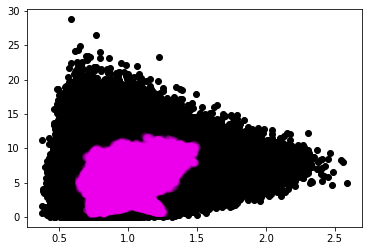

In [44]:
upto_ind_run=24
plt.scatter(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run]['Rg/Rg_mean'].values,
            GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run]['ratio'].values,
            color='black')
plt.scatter(salmon_rg_ree_ratheatmap['Rg/Rg_mean'].values,
            salmon_rg_ree_ratheatmap['ratio'].values,
            color='magenta',alpha=0.05)

# plt.scatter(FKBP12_ESFF1_rg_ree_ratheatmap['Rg/Rg_mean'].values,
#             FKBP12_ESFF1_rg_ree_ratheatmap['ratio'].values,
#             color='magenta',alpha=0.05)



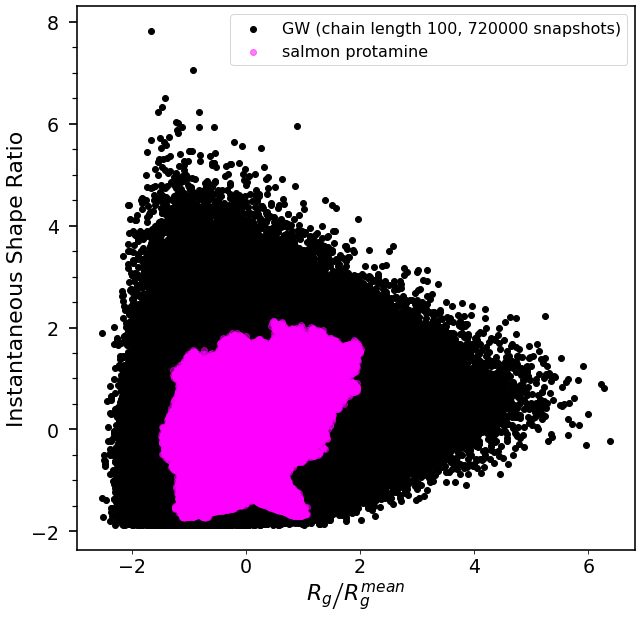

In [45]:
#double check this

fig,ax=plt.subplots(figsize=(10,10))
salmon_pro=salmon_rg_ree_ratheatmap[['Rg/Rg_mean','ratio']].copy()
salmon_pro['polymer_id']=np.repeat('protein_salmon',salmon_pro.shape[0])
GW_po=GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run][['Rg/Rg_mean','ratio']].copy()
GW_po['polymer_id']=np.repeat('GW',GW_po.shape[0])


upto_snapshots=720000
GW_mean_Rg_Rg_mean=np.mean(GW_ind_runs_chainlen100['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
GW_std_Rg_Rg_mean=np.std(GW_ind_runs_chainlen100['Rg/Rg_mean'].values[0:(upto_snapshots+1)])
GW_mean_ratio=np.mean(GW_ind_runs_chainlen100['ratio'].values[0:(upto_snapshots+1)])
GW_std_ratio=np.std(GW_ind_runs_chainlen100['ratio'].values[0:(upto_snapshots+1)])

combined_pro_po=pd.concat([GW_po,salmon_pro],axis=0,ignore_index=True)
combined_pro_po['stdd_Rg/Rg_mean']=(combined_pro_po['Rg/Rg_mean'].values-GW_mean_Rg_Rg_mean)/GW_std_Rg_Rg_mean
combined_pro_po['stdd_ratio']=(combined_pro_po['ratio'].values-GW_mean_ratio)/GW_std_ratio

ax.scatter(combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values,
            combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_ratio'].values,color='black',
          label=f'GW (chain length 100, {len(GW_po)} snapshots)')

ax.scatter(combined_pro_po[combined_pro_po.polymer_id=='protein_salmon']['stdd_Rg/Rg_mean'].values,
            combined_pro_po[combined_pro_po.polymer_id=='protein_salmon']['stdd_ratio'].values,
            color='magenta',alpha=0.5, label='salmon protamine')

plt.setp(ax.get_xticklabels(),fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel(r'$R_g\left/R_g^{mean}\right.$' ,fontsize=22)


ax.set_ylabel('Instantaneous Shape Ratio',fontsize=22)
#color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
#ax.text(0.2,0.5,'both protein & GW have 180000 snapshots',
#                  transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

#plt.savefig('../supplemental_algorithm_figures/salmon_GW_standardized_data.png', dpi = 1000, bbox_inches='tight')    



100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


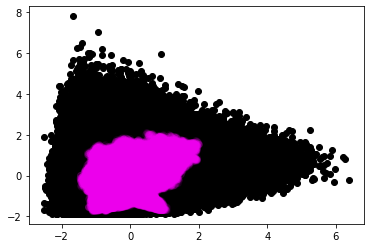

In [46]:
radius_=0.1
po_x=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_Rg/Rg_mean'].values
po_y=combined_pro_po[combined_pro_po.polymer_id=='GW']['stdd_ratio'].values
pro_x=combined_pro_po[combined_pro_po.polymer_id=='protein_salmon']['stdd_Rg/Rg_mean'].values
pro_y=combined_pro_po[combined_pro_po.polymer_id=='protein_salmon']['stdd_ratio'].values

salmon_points=np.c_[pro_x, pro_y]
plt.scatter(po_x,po_y,color='black')
plt.scatter(pro_x,pro_y,color='magenta',alpha=0.05)

pro_x=combined_pro_po[combined_pro_po.polymer_id=='protein_salmon']['stdd_Rg/Rg_mean'].values
pro_y=combined_pro_po[combined_pro_po.polymer_id=='protein_salmon']['stdd_ratio'].values

GW_points=np.c_[po_x, po_y]

tree_GW=spatial.cKDTree(GW_points)
tree_protein=spatial.cKDTree(salmon_points)

GW_not_in_range=[]
GW_in_range=[]
j=0
for point in GW_points:

    if not tree_protein.query_ball_point(point,radius_):
        GW_not_in_range.append(point)
    else:
        GW_in_range.append(point)
    j+=1
    if j%100000==0:
        print(f'{j} GW snapshots completed')

#fA_by_distance=(GW_points.shape[0]-len(GW_not_in_range))/(GW_points.shape[0])


In [101]:
ticklab

only use for combined_pro_po
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


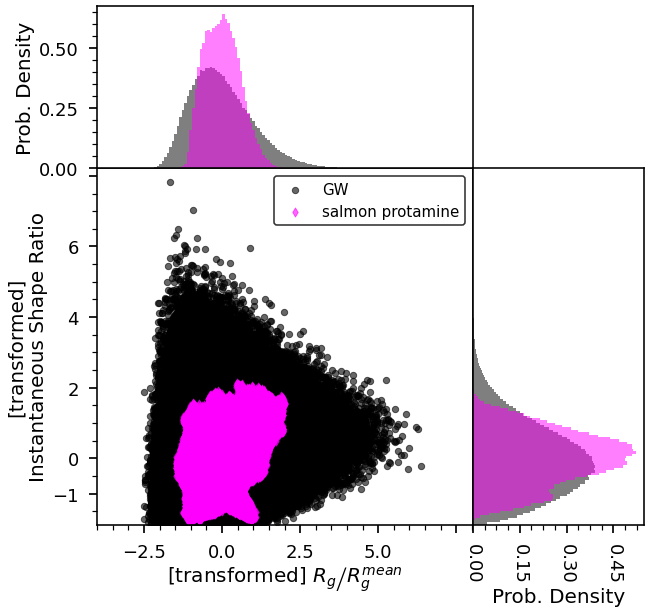

In [106]:
niche_protein_3dplot_against_GW_stdd_modified(combined_pro_po,'salmon',
                                              'protein','magenta')
plt.savefig('../supplemental_algorithm_figures/salmon_GW_standardized_data.png', dpi = 1000, bbox_inches='tight')    


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


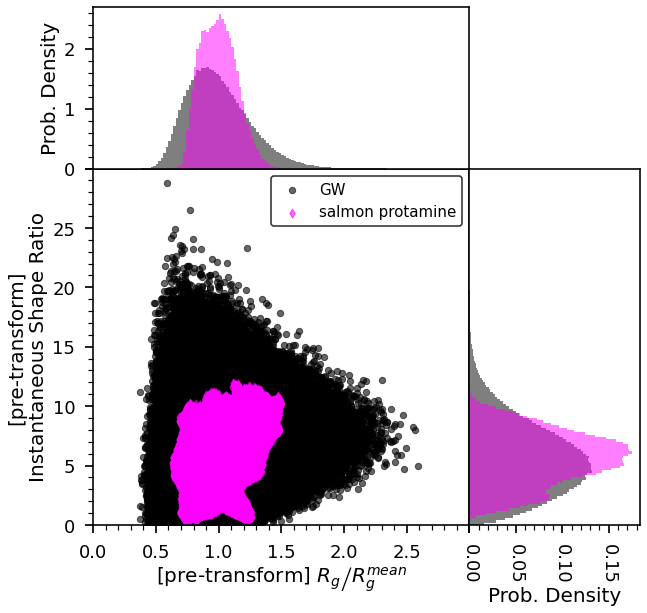

In [67]:
non_stdd_protein_3dplot_against_GW(salmon_rg_ree_ratheatmap,'salmon protamine',
                                              'protein','magenta')
plt.savefig('../supplemental_algorithm_figures/salmon_GW_non_standardized_data.png', dpi = 1000, bbox_inches='tight')    


In [48]:
combined_pro_po[combined_pro_po.polymer_id=='protein_salmon']

,Rg/Rg_mean,ratio,polymer_id,stdd_Rg/Rg_mean,stdd_ratio
720000,1.389312,9.673494,protein_salmon,1.563800,1.373669
720001,1.376762,9.590876,protein_salmon,1.513390,1.345879
720002,1.379343,9.537346,protein_salmon,1.523758,1.327873
720003,1.379173,9.530050,protein_salmon,1.523074,1.325418
720004,1.380466,9.672827,protein_salmon,1.528269,1.373444
...,...,...,...,...,...
1239995,0.989854,6.902366,protein_salmon,-0.040755,0.441548
1239996,0.994703,6.635757,protein_salmon,-0.021279,0.351869
1239997,0.997087,7.129950,protein_salmon,-0.011702,0.518100
1239998,0.998859,7.249384,protein_salmon,-0.004583,0.558274


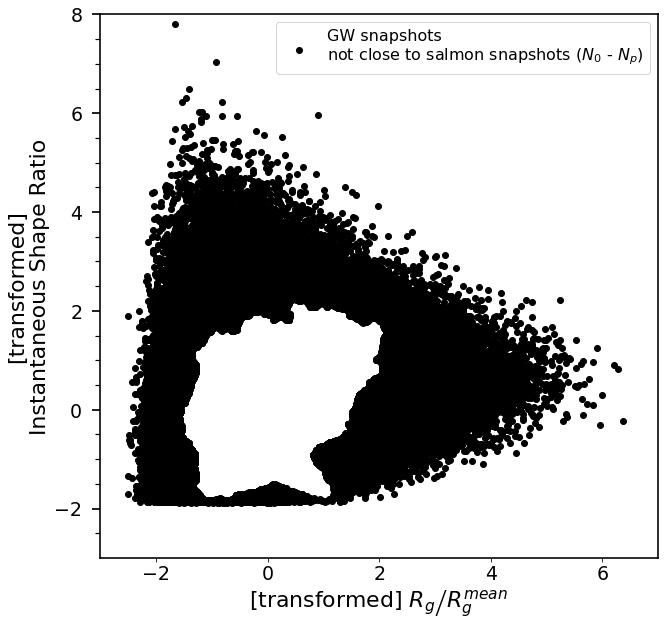

In [53]:
fig,ax=plt.subplots(figsize=(10,10))

ax.scatter([point[0] for point in np.array(GW_not_in_range)],
          
          [point[1] for point in np.array(GW_not_in_range)],
          color='black',
          label='GW snapshots\nnot close to salmon snapshots ($N_0$ - $N_p$)')

plt.setp(ax.get_xticklabels(),fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('[transformed] '+r'$R_g\left/R_g^{mean}\right.$ ' ,fontsize=22)
ax.set_ylabel('[transformed]\n''Instantaneous Shape Ratio',fontsize=22)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.set_ylim(-3,8)
ax.set_xlim(-3,7)
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)

plt.savefig('../supplemental_algorithm_figures/GW_snapshots_NOT_close_to_salmon.png', dpi = 1000, bbox_inches='tight')    


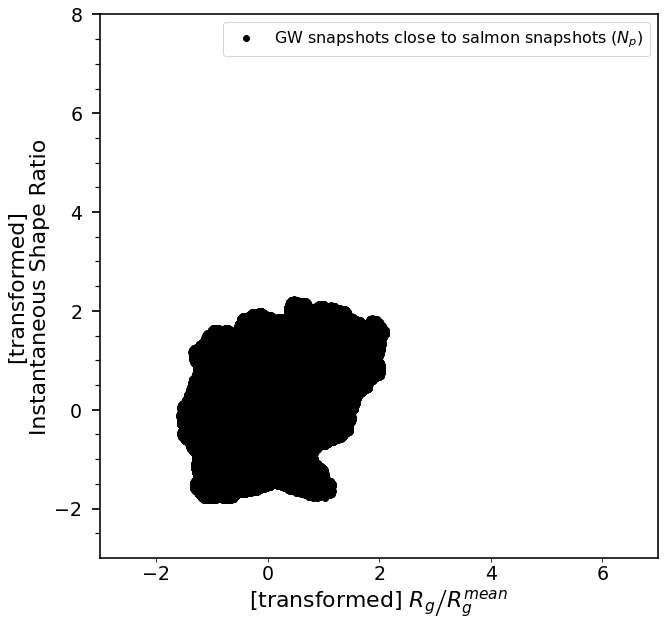

In [51]:
fig,ax=plt.subplots(figsize=(10,10))

ax.scatter([point[0] for point in np.array(GW_in_range)],
          
          [point[1] for point in np.array(GW_in_range)],
          color='black',
          label='GW snapshots close to salmon snapshots ($N_p$)')

plt.setp(ax.get_xticklabels(),fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('[transformed] '+r'$R_g\left/R_g^{mean}\right.$ ' ,fontsize=22)
ax.set_ylabel('[transformed]\n''Instantaneous Shape Ratio',fontsize=22)


for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)

    
ax.set_ylim(-3,8)
ax.set_xlim(-3,7)    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)

plt.savefig('../supplemental_algorithm_figures/GW_snapshots_close_to_salmon.png', dpi = 1000, bbox_inches='tight')    


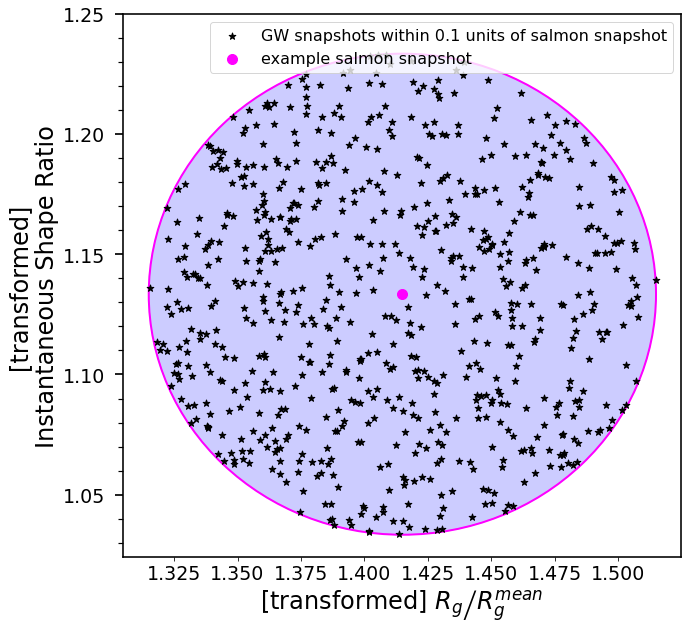

In [71]:
fig,ax=plt.subplots(figsize=(10,10))

chosen_salmon_point=salmon_points[23]
 
circle_salmon=plt.Circle((chosen_salmon_point[0],chosen_salmon_point[1]), 0.1, color='blue',alpha=0.2)
circle_salmon_border=plt.Circle((chosen_salmon_point[0],chosen_salmon_point[1]),0.1, 
                                color='magenta',fill=False,linewidth=2)
ax.add_patch(circle_salmon)
ax.add_patch(circle_salmon_border)

j=0
for point_ in tree_GW.query_ball_point(chosen_salmon_point,0.1):
    if j==0:
        ax.scatter(GW_points[point_][0], GW_points[point_][1],color='black',
                   label='GW snapshots within 0.1 units of salmon snapshot',
                  s=50,marker='*')
    else:
        ax.scatter(GW_points[point_][0], GW_points[point_][1],color='black',
                  s=50,marker='*')
    j+=1
    
ax.scatter(chosen_salmon_point[0],chosen_salmon_point[1],label='example salmon snapshot',
           color='magenta',s=100)
    
plt.setp(ax.get_xticklabels(),fontsize=19)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('[transformed] '+r'$R_g\left/R_g^{mean}\right.$ ' ,fontsize=24)
ax.set_ylabel('[transformed]\n''Instantaneous Shape Ratio',fontsize=24)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)

ax.set_ylim(1.024,1.250)    
  
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
plt.savefig('../supplemental_algorithm_figures/salmon_radius_0.1_snapshot_illustration.png', dpi = 1000, bbox_inches='tight')    
    

In [72]:
len(GW_in_range)#/720000

593679

# increasing GW snapshots while keeping protein constant

In [78]:
#chain lenghts 100, 200 and 300 here
GW_snaps=[]
fA_value_3rd_for_100=[]
fA_value_3rd_for_200=[]
fA_value_3rd_for_300=[]
for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd_for_100.append(fA_using_cdist(salmon_rg_ree_ratheatmap,
                                           'salmon','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,salmon_rg_ree_ratheatmap.shape[0],1,0.1))
        fA_value_3rd_for_200.append(fA_using_cdist(salmon_rg_ree_ratheatmap,
                                           'salmon','protein',GW_ind_runs_chainlen200,
                                           upto_ind_run,salmon_rg_ree_ratheatmap.shape[0],1,0.1))
        fA_value_3rd_for_300.append(fA_using_cdist(salmon_rg_ree_ratheatmap,
                                           'salmon','protein',GW_ind_runs_chainlen300,
                                           upto_ind_run,salmon_rg_ree_ratheatmap.shape[0],1,0.1))
        



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW 

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW 

900000 GW snapshots completed
1000000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
10000

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
80

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots compl

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots compl

900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots co

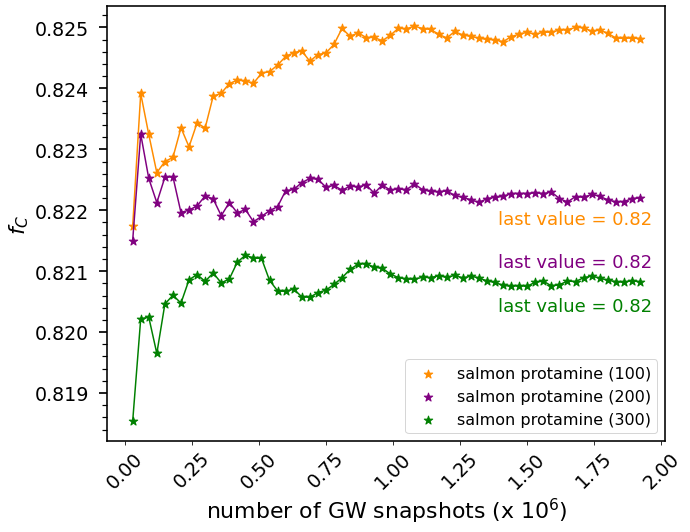

In [79]:

fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd_for_100,
           color='darkorange',label='salmon protamine (100)' ,
           marker='*',s=80)
ax.plot(GW_snaps,
       fA_value_3rd_for_100,
       color='darkorange')
ax.scatter(GW_snaps,
           fA_value_3rd_for_200,
           color='purple',label='salmon protamine (200)' ,
           marker='*',s=80)
ax.plot(GW_snaps,
       fA_value_3rd_for_200,
       color='purple')
ax.scatter(GW_snaps,
           fA_value_3rd_for_300,
           color='green',label='salmon protamine (300)' ,
           marker='*',s=80)
ax.plot(GW_snaps,
       fA_value_3rd_for_300,
       color='green')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots (x $10^6$)',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_for_100[len(fA_value_3rd_for_100)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='darkorange')
ax.text(0.7,0.4,f'last value = {format(fA_value_3rd_for_200[len(fA_value_3rd_for_200)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='purple')
ax.text(0.7,0.3,f'last value = {format(fA_value_3rd_for_300[len(fA_value_3rd_for_300)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='green')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
ax.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(x/10**6, '0.2f')))
#ax.set_xscale('log')
#ax.set_yscale('log')

#plt.savefig('../supplemental_algorithm_figures/salmon_shortsims_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [60]:
#testing chain lengths 100, 500 and 1000 (but using chain length 100 for paper)
#this is in response to reviewer question about why we are using chainlength 100 as reference

GW_snaps=[]
fA_value_3rd_for_100=[]
fA_value_3rd_for_500=[]
fA_value_3rd_for_1000=[]

for upto_ind_run in range(1,65):
        #GW_snaps is recording # of snapshots and it doesn't matter which chainlength, they are all 30000 per ind_run
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd_for_100.append(fA_using_cdist(salmon_rg_ree_ratheatmap,
                                           'salmon','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,salmon_rg_ree_ratheatmap.shape[0],1,0.1))
        fA_value_3rd_for_500.append(fA_using_cdist(salmon_rg_ree_ratheatmap,
                                           'salmon','protein',GW_ind_runs_chainlen500,
                                           upto_ind_run,salmon_rg_ree_ratheatmap.shape[0],1,0.1))
        fA_value_3rd_for_1000.append(fA_using_cdist(salmon_rg_ree_ratheatmap,
                                           'salmon','protein',GW_ind_runs_chainlen1000,
                                           upto_ind_run,salmon_rg_ree_ratheatmap.shape[0],1,0.1))
        



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW 

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW 

900000 GW snapshots completed
1000000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
10000

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
80

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots compl

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots compl

900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots co

In [68]:
print(GW_ind_runs_chainlen100['Rg/Rg_mean'].min(),
     GW_ind_runs_chainlen100['Rg/Rg_mean'].max(),
     GW_ind_runs_chainlen100['ratio'].min(),
     GW_ind_runs_chainlen100['ratio'].max())
print(GW_ind_runs_chainlen500['Rg/Rg_mean'].min(),
     GW_ind_runs_chainlen500['Rg/Rg_mean'].max(),
     GW_ind_runs_chainlen500['ratio'].min(),
     GW_ind_runs_chainlen500['ratio'].max())
print(GW_ind_runs_chainlen1000['Rg/Rg_mean'].min(),
     GW_ind_runs_chainlen1000['Rg/Rg_mean'].max(),
     GW_ind_runs_chainlen1000['ratio'].min(),
     GW_ind_runs_chainlen1000['ratio'].max())

0.36638487018815846 2.798373428755951 2.5355223802553526e-05 28.822411168844837
0.3554930607024768 2.665365926327323 0.0005447657793768896 27.605339617293755
0.3602155708133921 2.723247352797651 0.00013572716394654388 31.908556794937354


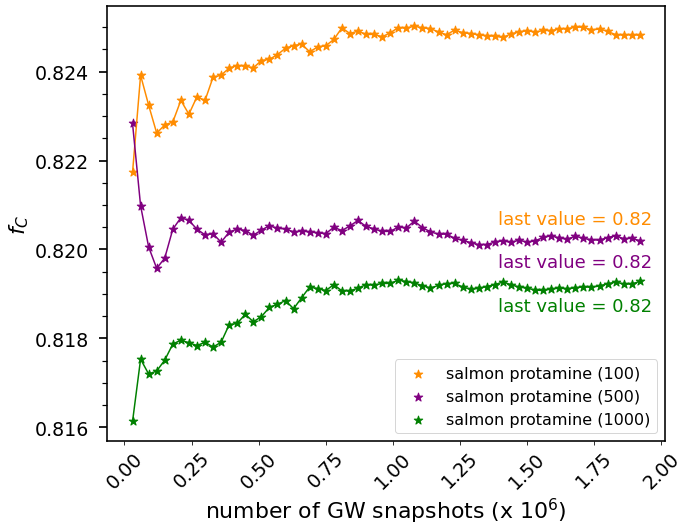

In [76]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd_for_100,
           color='darkorange',label='salmon protamine (100)' ,
           marker='*',s=80)
ax.plot(GW_snaps,
       fA_value_3rd_for_100,
       color='darkorange')
ax.scatter(GW_snaps,
           fA_value_3rd_for_500,
           color='purple',label='salmon protamine (500)' ,
           marker='*',s=80)
ax.plot(GW_snaps,
       fA_value_3rd_for_500,
       color='purple')
ax.scatter(GW_snaps,
           fA_value_3rd_for_1000,
           color='green',label='salmon protamine (1000)' ,
           marker='*',s=80)
ax.plot(GW_snaps,
       fA_value_3rd_for_1000,
       color='green')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots (x $10^6$)',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_for_100[len(fA_value_3rd_for_100)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='darkorange')
ax.text(0.7,0.4,f'last value = {format(fA_value_3rd_for_500[len(fA_value_3rd_for_500)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='purple')
ax.text(0.7,0.3,f'last value = {format(fA_value_3rd_for_1000[len(fA_value_3rd_for_1000)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='green')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
ax.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(x/10**6, '0.2f')))
#ax.set_xscale('log')
#ax.set_yscale('log')

#plt.savefig('../supplemental_algorithm_figures/salmon_shortsims_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [75]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(p1_rg_ree_ratheatmap,
                                           'human_P1','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,p1_rg_ree_ratheatmap.shape[0],1,0.1))



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW 

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots complete

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots co

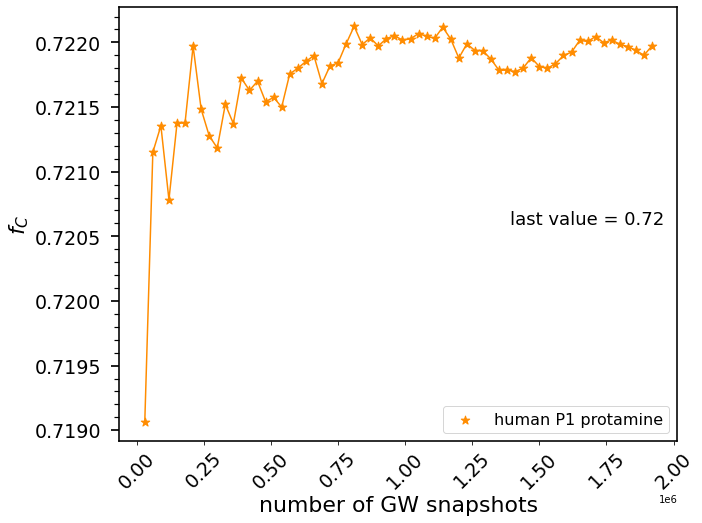

In [76]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='human P1 protamine' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/p1_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [77]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(bull_rg_ree_ratheatmap,
                                           'bull_P1','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,bull_rg_ree_ratheatmap.shape[0],1,0.1))



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW 

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots complete

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots co

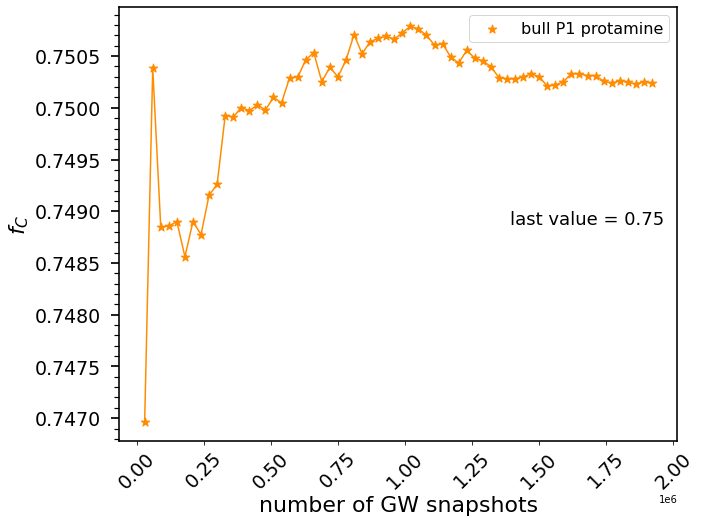

In [78]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='bull P1 protamine' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/bull_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [79]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(tauF4_esff1_rg_ree_ratheatmap,
                                           'tauF4','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,tauF4_esff1_rg_ree_ratheatmap.shape[0],1,0.1))



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW 

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots complete

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots co

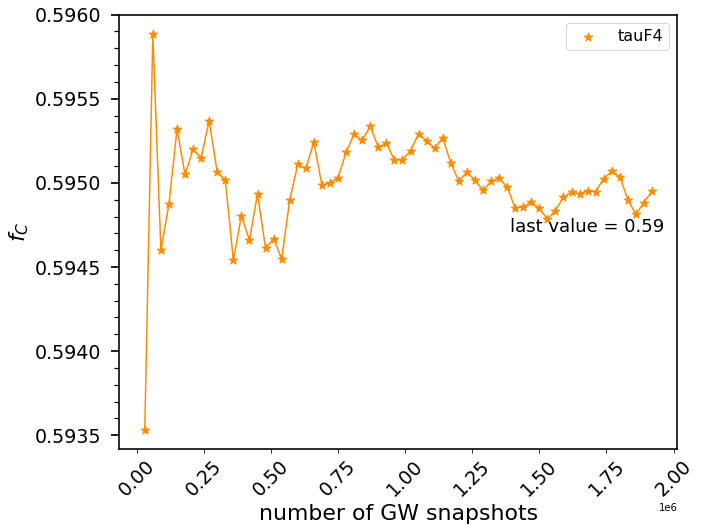

In [80]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='tauF4' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/tauF4_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [81]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(ab40_ff14sb_rg_ree_ratheatmap_noimage,
                                           'ab40','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,ab40_ff14sb_rg_ree_ratheatmap_noimage.shape[0],1,0.1))



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW 

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots complete

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots co

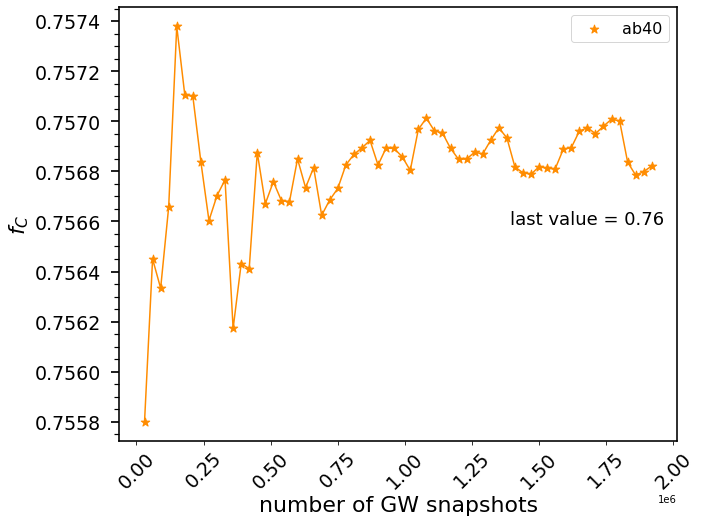

In [82]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='ab40' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/ab40_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [83]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(FKBP12_ESFF1_rg_ree_ratheatmap,
                                           'FKBP12','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,FKBP12_ESFF1_rg_ree_ratheatmap.shape[0],1,0.1))



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW 

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots complete

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots co

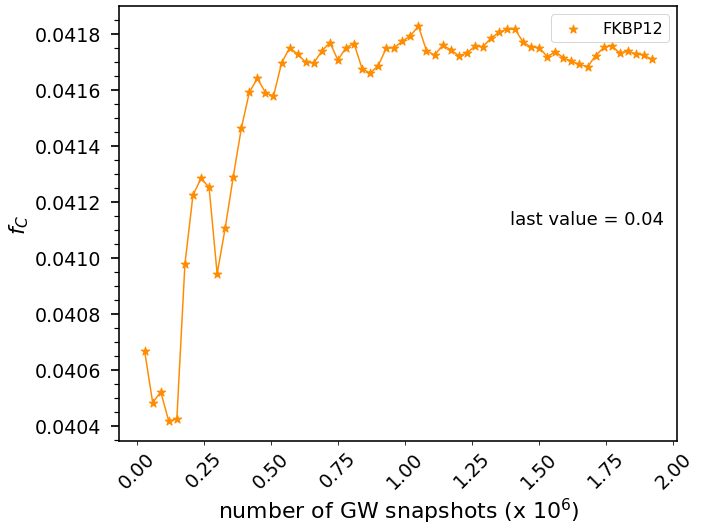

In [84]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='FKBP12' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots (x $10^6$)',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)
ax.legend(fontsize=16)
ax.get_xaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(x/10**6, '0.2f')))

#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/FKBP12_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [85]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(lush_ESFF1_rg_ree_ratheatmap,
                                           'LUSH','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,lush_ESFF1_rg_ree_ratheatmap.shape[0],1,0.1))



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW 

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots complete

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots co

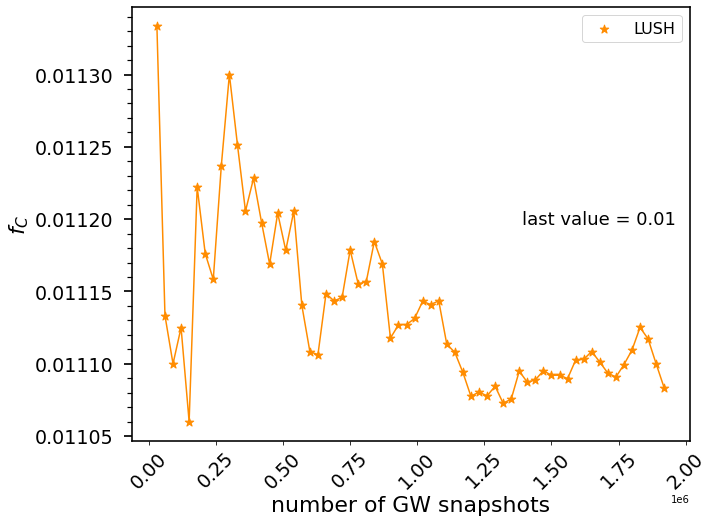

In [86]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='LUSH' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/LUSH_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [87]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(ubiquitin_ESFF1_rg_ree_ratheatmap,
                                           'ubiquitin','protein',GW_ind_runs_chainlen100,
                                           upto_ind_run,ubiquitin_ESFF1_rg_ree_ratheatmap.shape[0],1,0.1))



100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
100000 GW 

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots complete

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots co

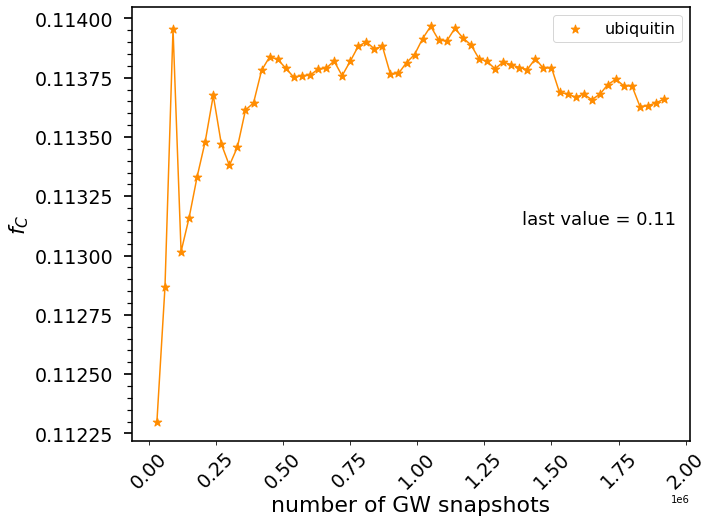

In [88]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='ubiquitin' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/ubiqituin_vary_GW.png', dpi = 1000, bbox_inches='tight')    



for PEI include proton state in input
100000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots co

500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
1900000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
for PEI include proton state

800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
1800000 GW snapshots completed
1900000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
for PE

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW s

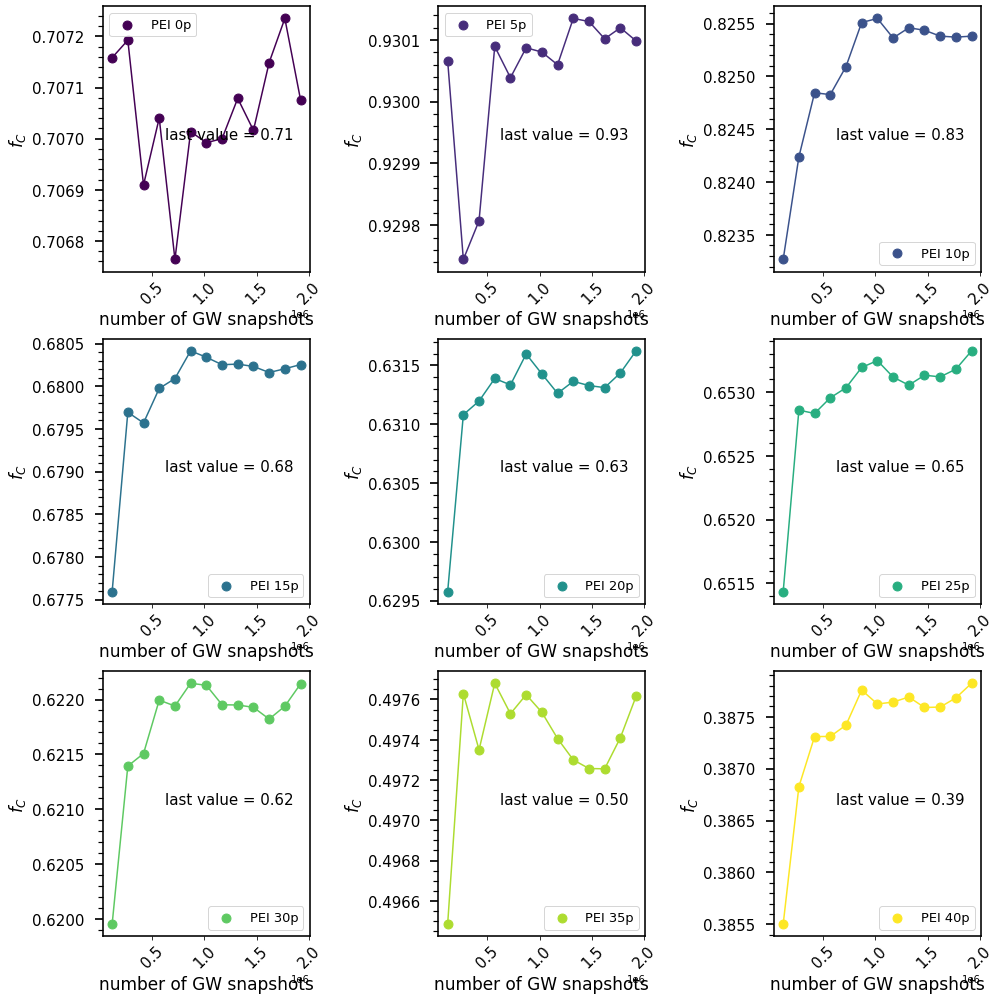

In [89]:

#after definition changed
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(14,14))
plt.subplots_adjust(hspace=0.5)
proton_list=pei_ratheatmap.proton.unique()
color_list = iter(cm.viridis(np.linspace(0, 1, pei_ratheatmap.proton.unique().shape[0])))

for proton,ax in zip(proton_list, axs.ravel()):
    GW_snaps=[]
    fA_value_3rd=[]
    interim_color=next(color_list)

    for upto_ind_run in range(4,69,5):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(pei_ratheatmap[pei_ratheatmap.proton==proton],
                                               'PEI','pei',GW_ind_runs_chainlen100,
                                               upto_ind_run,pei_ratheatmap[pei_ratheatmap.proton==proton].shape[0],1,0.1))


    ax.scatter(GW_snaps,
               fA_value_3rd,
               color=interim_color,label=f'PEI {proton}p' ,
               marker='o',s=80,facecolors=None)

    #popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
    ax.plot(GW_snaps,
           fA_value_3rd,
           color=interim_color)
    #x=GW_snaps#+[2000000,2500000,3000000,4000000]
    #ax.plot(x, target_func(x, *popt), 'r-')
    #del x
    #plt.legend()


    plt.setp(ax.get_xticklabels(),fontsize=15,rotation=45)
    #plt.setp(ax.get_yticklabels(),fontsize=15)
    ax.set_xlabel('number of GW snapshots',fontsize=17)
    ax.set_ylabel('$f_C$',fontsize=17)

    #ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
    ax.text(0.3,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                     transform=ax.transAxes,fontsize=15,color='black')

    #ax.set_ylim(-0.05,1)
    for i in ['top', 'left', 'right', 'bottom']:
        ax.spines[i].set_linewidth(1.6)

    ax.minorticks_on()
    ax.tick_params(axis='y', which='major', labelsize=15, width = 1.7, size = 8,pad=10)
    ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
    ax.tick_params(axis='x', which='minor',bottom=False)        
    ax.legend(fontsize=13)
    #ax.set_xscale('log')
    #ax.set_yscale('log')

plt.tight_layout()
plt.savefig('../supplemental_algorithm_figures/pei_vary_GW.png', dpi = 1000, bbox_inches='tight')    
    




In [90]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==0],
                                           'RW','polymer',GW_ind_runs_chainlen100,
                                           upto_ind_run,RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==0].shape[0],1,0.1))



for RW or SAW include epas in input
for RW or SAW include epas in input
for RW or SAW include epas in input
for RW or SAW include epas in input
100000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
for RW or SAW include epas i

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW sna

500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW sn

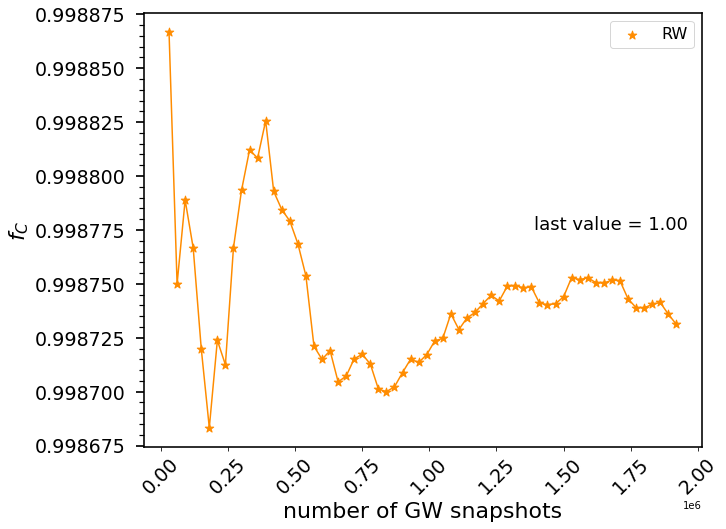

In [91]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='RW' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/RW_vary_GW.png', dpi = 1000, bbox_inches='tight')    



In [92]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(fA_using_cdist(SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==0],
                                           'RW','polymer',GW_ind_runs_chainlen100,
                                           upto_ind_run,SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==0].shape[0],1,0.1))



for RW or SAW include epas in input
for RW or SAW include epas in input
for RW or SAW include epas in input
for RW or SAW include epas in input
100000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
for RW or SAW include epas i

1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW sna

500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
1700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW sn

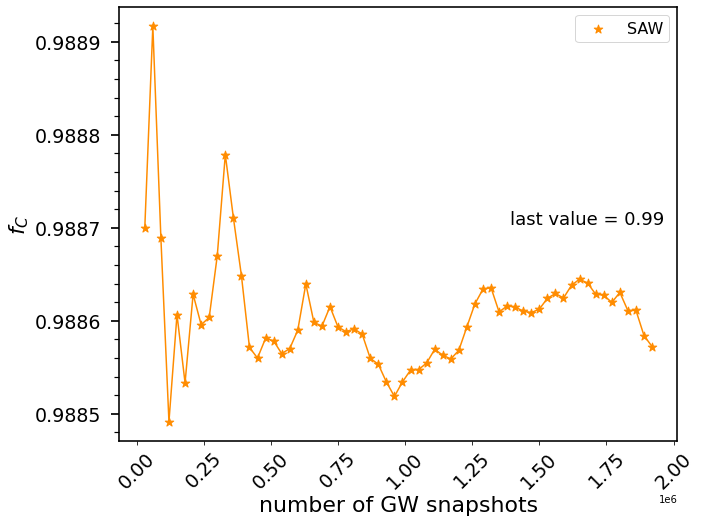

In [93]:



fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='SAW' ,
           marker='*',s=80)


ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of GW snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/SAW_vary_GW.png', dpi = 1000, bbox_inches='tight')    



# increasing protein snapshots while keeping GW constant

In [94]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,525000,5000):
    protein_snaps.append(salmon_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(salmon_rg_ree_ratheatmap,
                                           'salmon','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW 

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW 

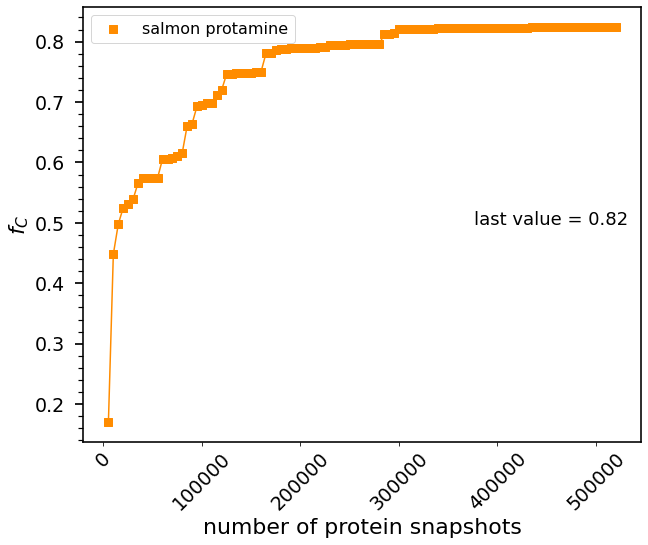

In [95]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='salmon protamine' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/salmon_shortsims_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [96]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,525000,5000):
    protein_snaps.append(p1_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(p1_rg_ree_ratheatmap,
                                           'human_P1','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW 

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW 

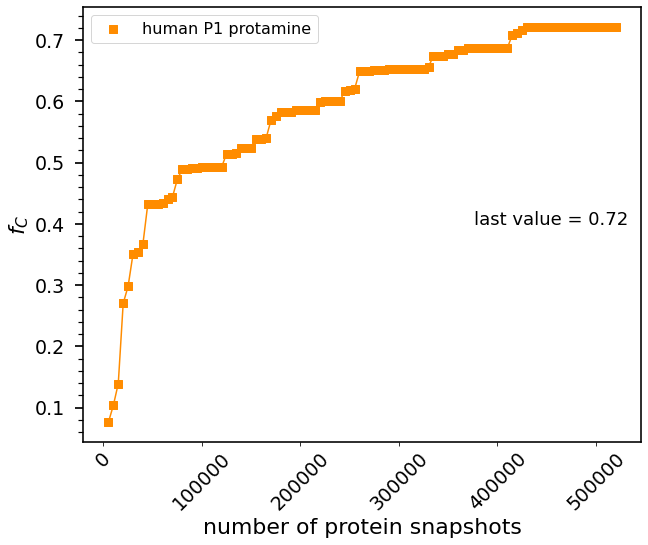

In [97]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='human P1 protamine' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/p1_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [98]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,525000,5000):
    protein_snaps.append(bull_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(bull_rg_ree_ratheatmap,
                                           'bull_P1','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW 

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW 

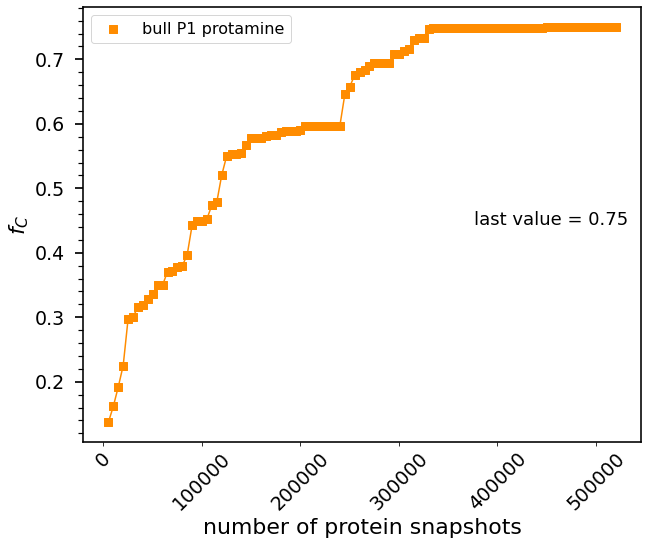

In [99]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='bull P1 protamine' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

#plt.savefig('../supplemental_algorithm_figures/p1_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [100]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,205000,5000):
    protein_snaps.append(ab40_ff14sb_rg_ree_ratheatmap_noimage['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(ab40_ff14sb_rg_ree_ratheatmap_noimage,
                                           'ab40','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


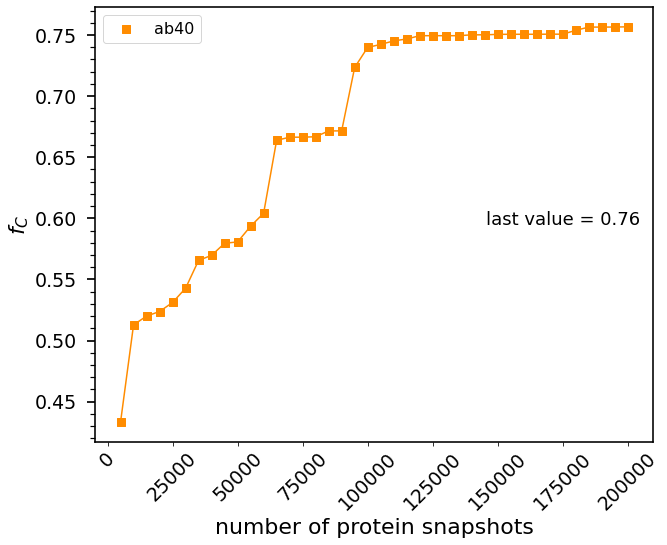

In [101]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='ab40' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/ab40_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [102]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,205000,5000):
    protein_snaps.append(tauF4_esff1_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(tauF4_esff1_rg_ree_ratheatmap,
                                           'tauF4','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


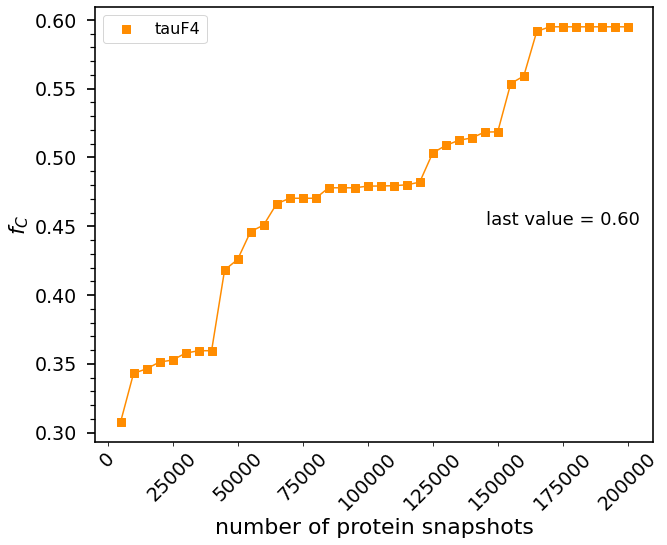

In [103]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='tauF4' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/tauF4_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [104]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,205000,5000):
    protein_snaps.append(ubiquitin_ESFF1_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(ubiquitin_ESFF1_rg_ree_ratheatmap,
                                           'ubiquitin','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


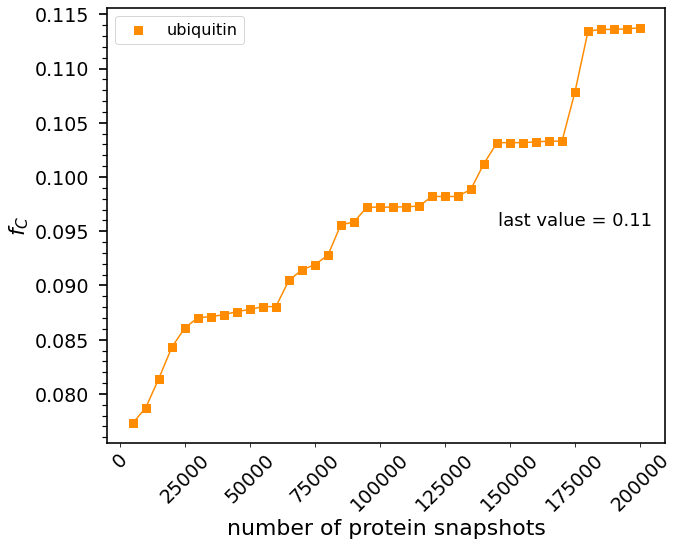

In [105]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='ubiquitin' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/ubiquitin_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [106]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,205000,5000):
    protein_snaps.append(FKBP12_ESFF1_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(FKBP12_ESFF1_rg_ree_ratheatmap,
                                           'FKBP12','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


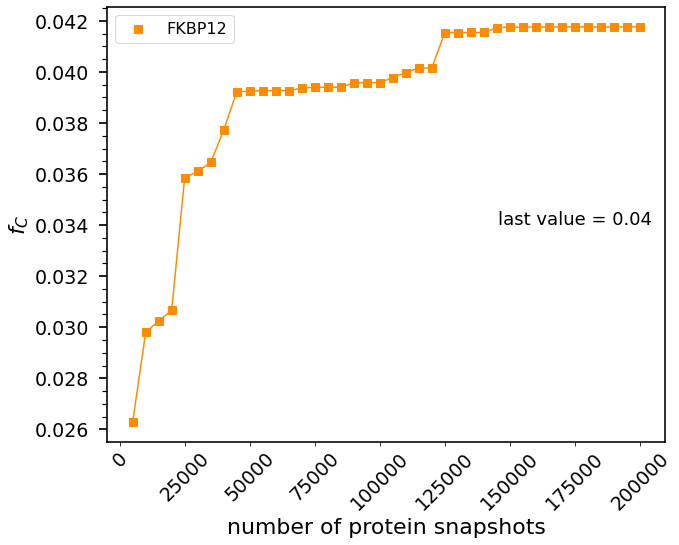

In [107]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='FKBP12' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/FKBP12_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [108]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,205000,5000):
    protein_snaps.append(lush_ESFF1_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(lush_ESFF1_rg_ree_ratheatmap,
                                           'LUSH','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed


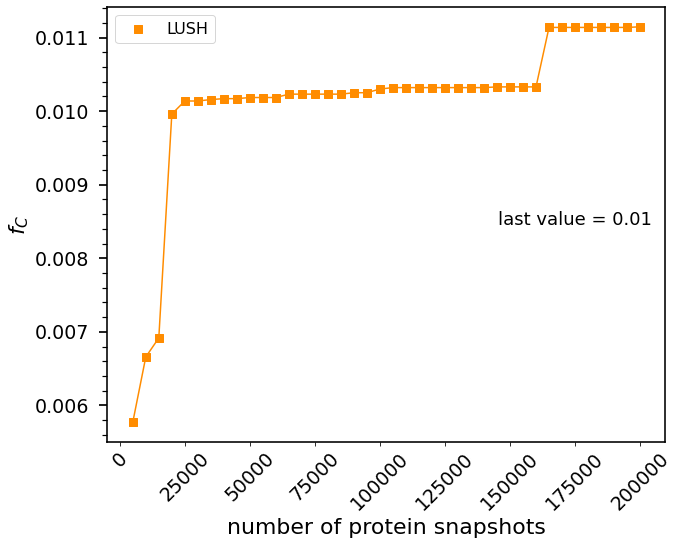

In [109]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='LUSH' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/lush_vary_protein.png', dpi = 1000, bbox_inches='tight')    



# changing protamines to be 1000ns over 200,000 snapshots
# ONLY specific to protamine this chunk of code

In [110]:
print('THIS ONLY applies to protamines, due to 520,000 snapshots')
# i want to make it such that protamine has ~200,000 snapshots over 1040 ns, instead of 520,000 over 1040 ns
protamine_base_indices=np.array([1,4])
running_index=np.array([])
j=0
while np.max(protamine_base_indices+(j*5))<=salmon_rg_ree_ratheatmap.shape[0]:
    running_index=np.append(running_index,protamine_base_indices+(j*5))
    j+=1

THIS ONLY applies to protamines, due to 520,000 snapshots


In [111]:
#for salmon also doing smaller radius and larger radius to demonstrate to Dr Wang
protamine_df=salmon_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]
#fA_value_3rd_protein_smaller_radius=[]
#fA_value_3rd_protein_bigger_radius=[]

for every_ith_snap in range(4000,210000,4000):
    protein_snaps.append(protamine_df['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(protamine_df,
                                           'salmon_1040ns_208000','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))
#     fA_value_3rd_protein_smaller_radius.append(fA_using_cdist(protamine_df,
#                                            'salmon_1040ns_208000','protein',GW_ind_runs_chainlen100,
#                                            24,every_ith_snap,1,0.05))
#     fA_value_3rd_protein_bigger_radius.append(fA_using_cdist(protamine_df,
#                                            'salmon_1040ns_208000','protein',GW_ind_runs_chainlen100,
#                                            24,every_ith_snap,1,0.2))
    
    

del protamine_df


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW 

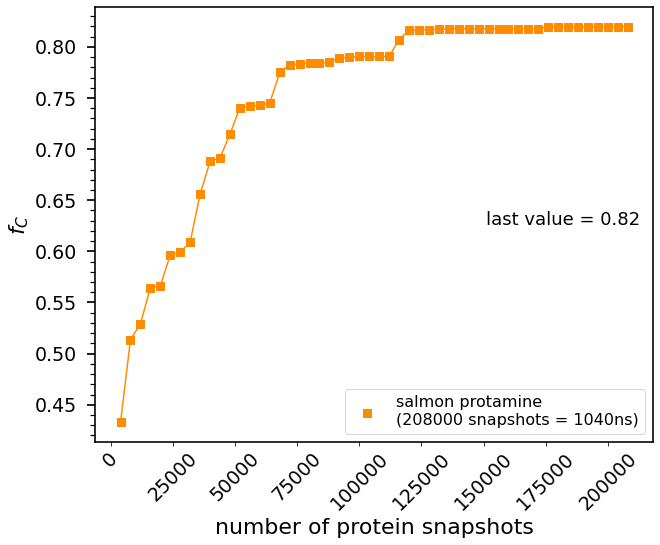

In [112]:

fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='salmon protamine\n(208000 snapshots = 1040ns)' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#the below scatter plots - testing higher and lower radius 

# ax.scatter(protein_snaps,
#            fA_value_3rd_protein_smaller_radius,
#            color='green',label='radius = 0.05' ,
#            marker='+',s=80)
# ax.plot(protein_snaps,
#        fA_value_3rd_protein_smaller_radius,
#        color='green')
# ax.scatter(protein_snaps,
#            fA_value_3rd_protein_bigger_radius,
#            color='red',label='radius = 0.2' ,
#            marker='+',s=80)
# ax.plot(protein_snaps,
#        fA_value_3rd_protein_bigger_radius,
#        color='red')




#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/salmon_208000_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [113]:
protamine_df=p1_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(4000,210000,4000):
    protein_snaps.append(protamine_df['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(protamine_df,
                                           'humanP1_1040ns_208000','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))

del protamine_df


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW 

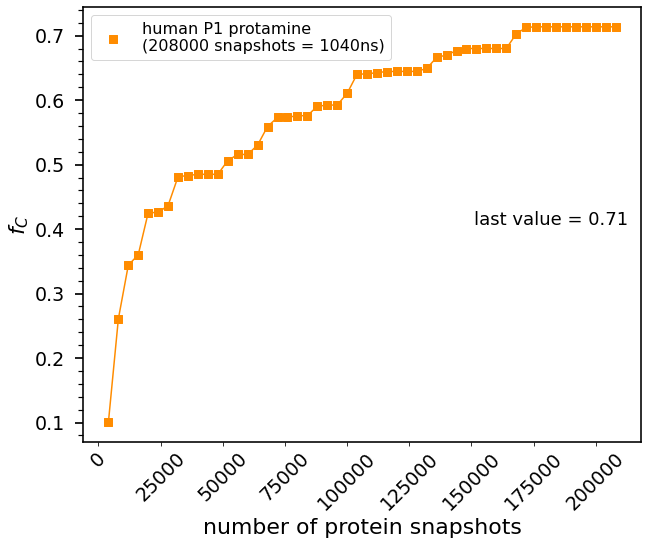

In [114]:

fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='human P1 protamine\n(208000 snapshots = 1040ns)' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/p1_208000_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [115]:
protamine_df=bull_rg_ree_ratheatmap.reset_index(drop=True).copy()
protamine_df=protamine_df[protamine_df.index.isin(running_index)]

#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(4000,210000,4000):
    protein_snaps.append(protamine_df['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(protamine_df,
                                           'bullP1_1040ns_208000','protein',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))

del protamine_df


100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW 

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW 

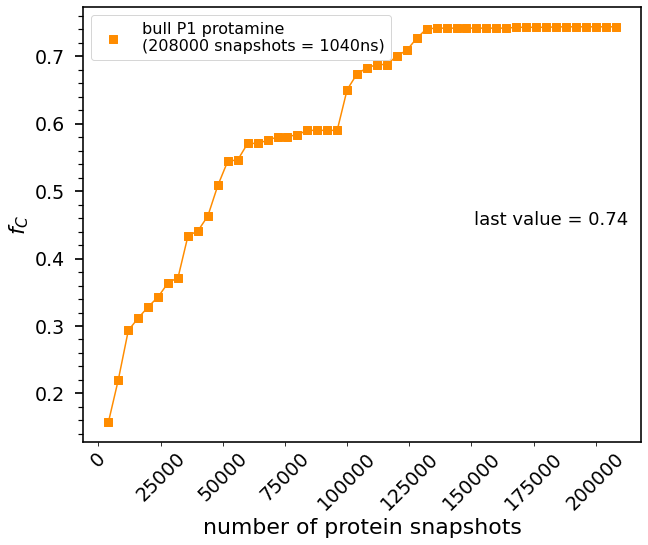

In [116]:

fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='bull P1 protamine\n(208000 snapshots = 1040ns)' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/bull_208000_vary_protein.png', dpi = 1000, bbox_inches='tight')    
del running_index


# increasing protein snapshots for polymers and pei

for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI 

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 G

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 G

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 G

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 G

500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 G

600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 G

700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 G

for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI 

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 G

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 G

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 G

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 G

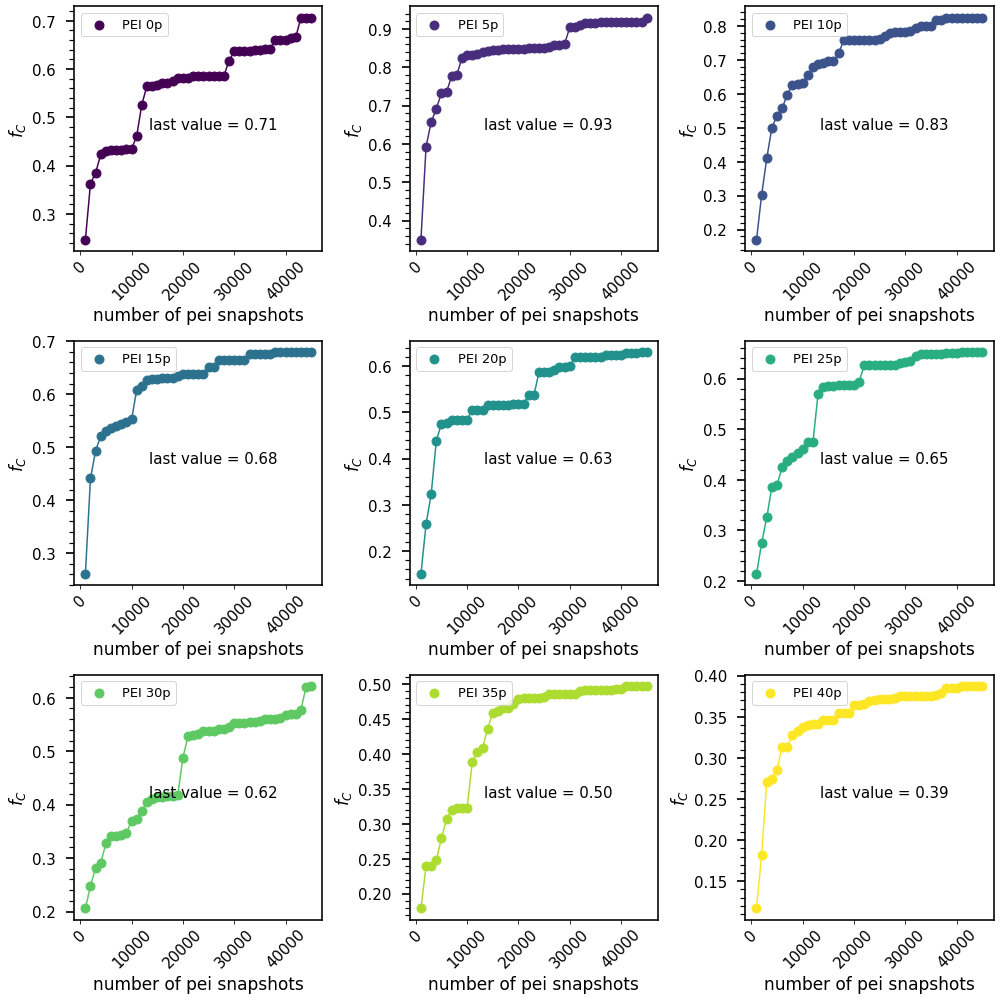

In [117]:

#after definition changed
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(14,14))
plt.subplots_adjust(hspace=0.5)
proton_list=pei_ratheatmap.proton.unique()
color_list = iter(cm.viridis(np.linspace(0, 1, pei_ratheatmap.proton.unique().shape[0])))

for proton,ax in zip(proton_list, axs.ravel()):
    protein_snaps=[]
    fA_value_3rd_protein=[]
    interim_color=next(color_list)
    
    for every_ith_snap in range(1000,45200,1000):
        protein_snaps.append(pei_ratheatmap[pei_ratheatmap.proton==proton]['ratio'].values[:every_ith_snap].shape[0])
        fA_value_3rd_protein.append(fA_using_cdist(pei_ratheatmap[pei_ratheatmap.proton==proton],
                                               'PEI','pei',GW_ind_runs_chainlen100,
                                               24,every_ith_snap,1,0.1))

#     protein_snaps.append(pei_ratheatmap[pei_ratheatmap.proton==proton]['ratio'].values[:every_ith_snap].shape[0])
#     fA_value_3rd_protein.append(fA_using_cdist(pei_ratheatmap[pei_ratheatmap.proton==proton],
#                                            'PEI','pei',GW_ind_runs_chainlen100,
#                                            24,every_ith_snap,1,0.1))


    ax.scatter(protein_snaps,
               fA_value_3rd_protein,
               color=interim_color,label=f'PEI {proton}p' ,
               marker='o',s=80,facecolors=None)

    #popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
    ax.plot(protein_snaps,
           fA_value_3rd_protein,
           color=interim_color)
    #x=GW_snaps#+[2000000,2500000,3000000,4000000]
    #ax.plot(x, target_func(x, *popt), 'r-')
    #del x
    #plt.legend()


    plt.setp(ax.get_xticklabels(),fontsize=15,rotation=45)
    #plt.setp(ax.get_yticklabels(),fontsize=15)
    ax.set_xlabel('number of pei snapshots',fontsize=17)
    ax.set_ylabel('$f_C$',fontsize=17)

    #ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
    ax.text(0.3,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                     transform=ax.transAxes,fontsize=15,color='black')

    #ax.set_ylim(-0.05,1)
    for i in ['top', 'left', 'right', 'bottom']:
        ax.spines[i].set_linewidth(1.6)

    ax.minorticks_on()
    ax.tick_params(axis='y', which='major', labelsize=15, width = 1.7, size = 8,pad=10)
    ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
    ax.tick_params(axis='x', which='minor',bottom=False)        
    ax.legend(fontsize=13)
    #ax.set_xscale('log')
    #ax.set_yscale('log')

plt.tight_layout()
plt.savefig('../supplemental_algorithm_figures/pei_vary_protein.png', dpi = 1000, bbox_inches='tight')    
    




for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI 

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 G

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 G

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 G

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 G

500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 G

600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 G

700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 G

for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI 

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 G

200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 G

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 G

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for PEI include proton state in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 G

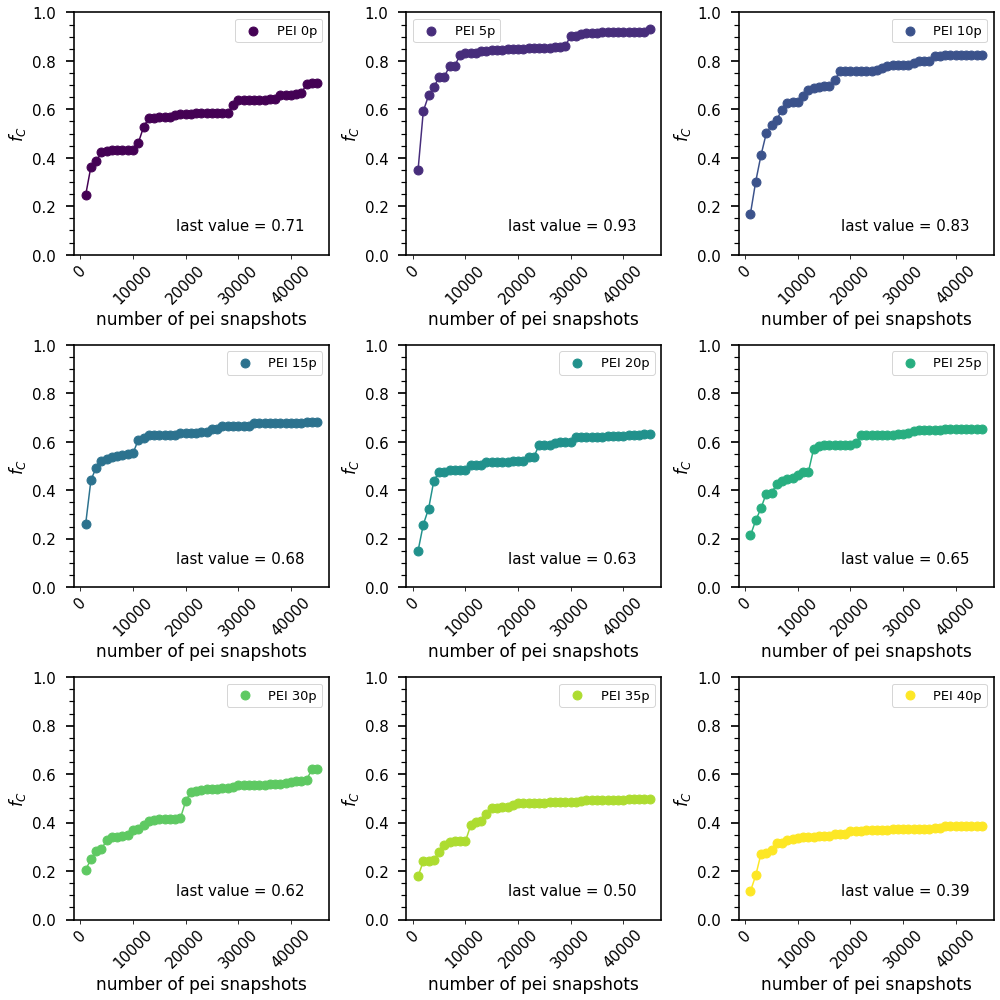

In [118]:

#after definition changed
fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(14,14))
plt.subplots_adjust(hspace=0.5)
proton_list=pei_ratheatmap.proton.unique()
color_list = iter(cm.viridis(np.linspace(0, 1, pei_ratheatmap.proton.unique().shape[0])))

for proton,ax in zip(proton_list, axs.ravel()):
    protein_snaps=[]
    fA_value_3rd_protein=[]
    interim_color=next(color_list)
    
    for every_ith_snap in range(1000,45200,1000):
        protein_snaps.append(pei_ratheatmap[pei_ratheatmap.proton==proton]['ratio'].values[:every_ith_snap].shape[0])
        fA_value_3rd_protein.append(fA_using_cdist(pei_ratheatmap[pei_ratheatmap.proton==proton],
                                               'PEI','pei',GW_ind_runs_chainlen100,
                                               24,every_ith_snap,1,0.1))

#     protein_snaps.append(pei_ratheatmap[pei_ratheatmap.proton==proton]['ratio'].values[:every_ith_snap].shape[0])
#     fA_value_3rd_protein.append(fA_using_cdist(pei_ratheatmap[pei_ratheatmap.proton==proton],
#                                            'PEI','pei',GW_ind_runs_chainlen100,
#                                            24,every_ith_snap,1,0.1))


    ax.scatter(protein_snaps,
               fA_value_3rd_protein,
               color=interim_color,label=f'PEI {proton}p' ,
               marker='o',s=80,facecolors=None)

    #popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
    ax.plot(protein_snaps,
           fA_value_3rd_protein,
           color=interim_color)
    #x=GW_snaps#+[2000000,2500000,3000000,4000000]
    #ax.plot(x, target_func(x, *popt), 'r-')
    #del x
    #plt.legend()


    plt.setp(ax.get_xticklabels(),fontsize=15,rotation=45)
    #plt.setp(ax.get_yticklabels(),fontsize=15)
    ax.set_xlabel('number of pei snapshots',fontsize=17)
    ax.set_ylabel('$f_C$',fontsize=17)

    #ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
    ax.text(0.4,0.1,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                     transform=ax.transAxes,fontsize=15,color='black')

    ax.set_ylim(0,1)
    for i in ['top', 'left', 'right', 'bottom']:
        ax.spines[i].set_linewidth(1.6)

    ax.minorticks_on()
    ax.tick_params(axis='y', which='major', labelsize=15, width = 1.7, size = 8,pad=10)
    ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
    ax.tick_params(axis='x', which='minor',bottom=False)        
    ax.legend(fontsize=13)
    #ax.set_xscale('log')
    #ax.set_yscale('log')

plt.tight_layout()
plt.savefig('../supplemental_algorithm_figures/pei_vary_protein_consistent_ylim.png', dpi = 1000, bbox_inches='tight')    
    




In [119]:
#after definition changed
#this is for polymer chain RW/SAW (single epas)
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(3000,162057,3000):
    protein_snaps.append(RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==0]['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(RW_equil_chain_rg_ree[RW_equil_chain_rg_ree.epas==0],
                                           'RW','polymer',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW in

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapsh

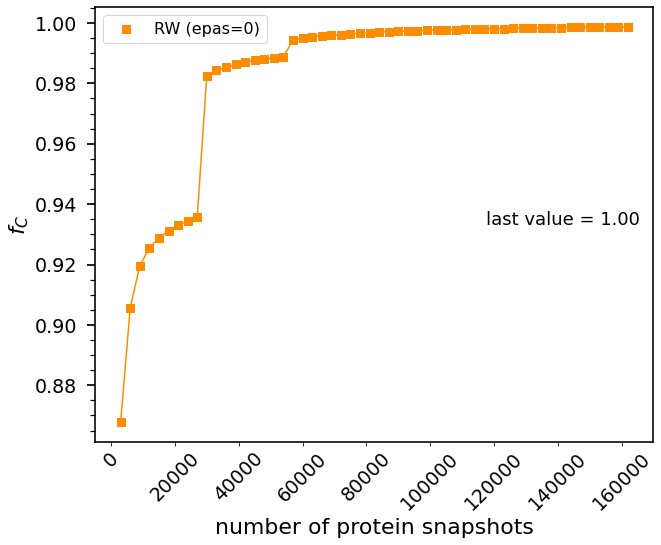

In [120]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='RW (epas=0)' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/RW_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [121]:
#after definition changed
#this is for polymer chain RW/SAW (single epas)
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(3000,162057,3000):
    protein_snaps.append(SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==0]['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(SAW_equil_chain_rg_ree[SAW_equil_chain_rg_ree.epas==0],
                                           'SAW','polymer',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))


for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW in

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapsh

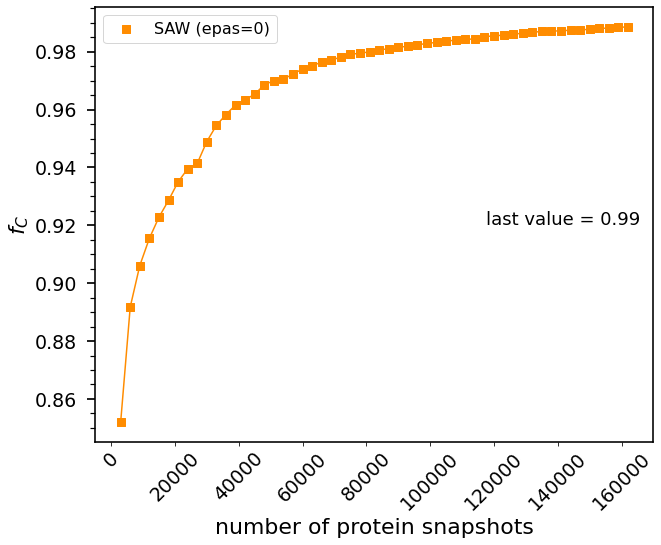

In [122]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='SAW (epas=0)' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/SAW_vary_protein.png', dpi = 1000, bbox_inches='tight')    



In [123]:
#after definition changed
#this is for polymer chain RW/SAW (single epas)
protein_snaps=[]
fA_value_3rd_protein=[]
testeq_SAW=SAW_ind_runs_chainlen100.copy()
for every_ith_snap in range(3000,162057,3000):
    protein_snaps.append(testeq_SAW[(testeq_SAW.run_number>0) & (testeq_SAW.epas==0.3)]['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(fA_using_cdist(testeq_SAW[(testeq_SAW.run_number>0) & (testeq_SAW.epas==0.3)],
                                           'SAW','polymer',GW_ind_runs_chainlen100,
                                           24,every_ith_snap,1,0.1))
del testeq_SAW

for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW in

300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
for RW or SAW include epas in input
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapsh

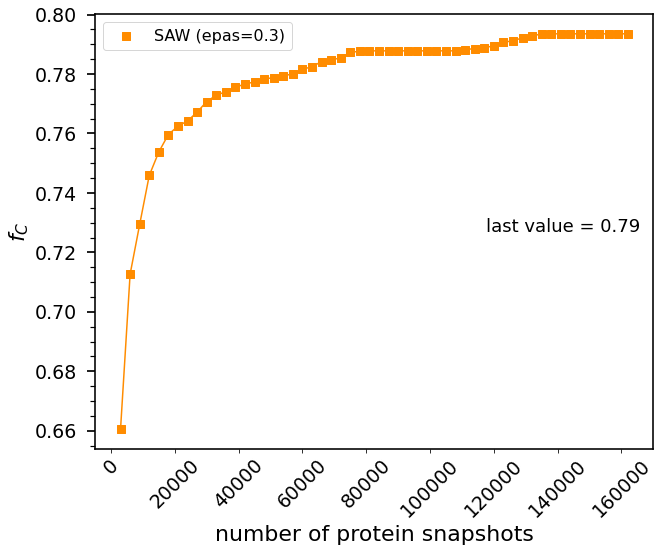

In [124]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='SAW (epas=0.3)' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.7,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.2f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('../supplemental_algorithm_figures/SAW_vary_protein_epas_0.3.png', dpi = 1000, bbox_inches='tight')    



# RSA based fC value (first varying GW snaps)

In [125]:
#after definition changed
GW_snaps=[]
fA_value_3rd=[]

for upto_ind_run in range(1,65):
        GW_snaps.append(GW_ind_runs_chainlen100[GW_ind_runs_chainlen100.run_number<=upto_ind_run].shape[0])
        fA_value_3rd.append(RSA_based_fC(ab40_ff14sb_rg_ree_ratheatmap_noimage,
                                           'ab40','protein',ab40_ff14sb_moments,GW_moments_ind_runs_100_,
                                           upto_ind_run,ab40_ff14sb_rg_ree_ratheatmap_noimage.shape[0],1,0.1))



moments_df and ratio_df must match in order of rows for protein/pei
moments_df and ratio_df must match in order of rows for protein/pei
moments_df and ratio_df must match in order of rows for protein/pei
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots 

800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW 

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots completed
1600000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
800000 GW snapshots completed
900000 GW snapshots completed
1000000 GW snapshots completed
1100000 GW snapshots completed
1200000 GW snapshots completed
1300000 GW snapshots completed
1400000 GW snapshots completed
1500000 GW snapshots

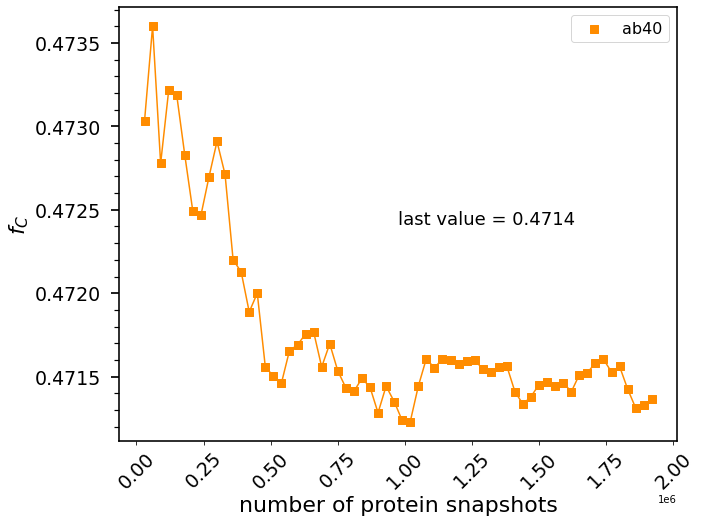

In [126]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(GW_snaps,
           fA_value_3rd,
           color='darkorange',label='ab40' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(GW_snaps,
       fA_value_3rd,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.5,0.5,f'last value = {format(fA_value_3rd[len(fA_value_3rd)-1],"0.4f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.savefig('../supplemental_algorithm_figures/ab40_vary_GW_RSA_based.png', dpi = 1000, bbox_inches='tight')    


# RSA based fC value (second varying protein snaps)

In [127]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,205000,5000):
    protein_snaps.append(lush_ESFF1_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(RSA_based_fC(lush_ESFF1_rg_ree_ratheatmap,
                                           'LUSH','protein',lush_ESFF1_moments,GW_moments_ind_runs_100_,
                                           24,every_ith_snap,1,0.1))



moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 G

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of

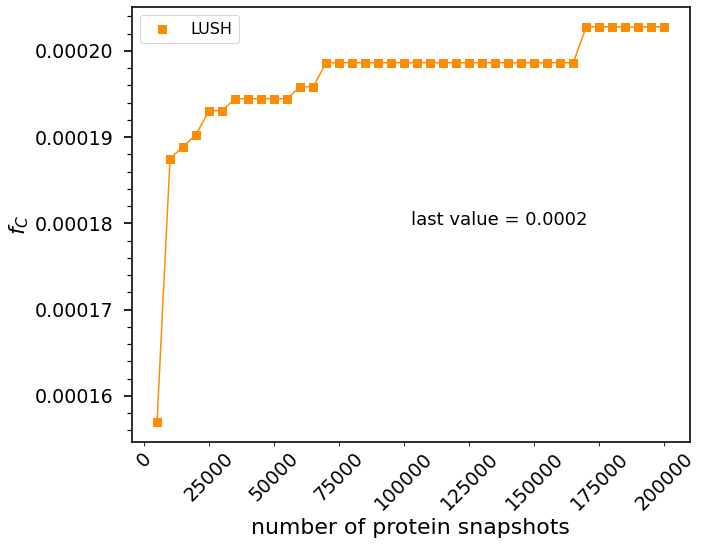

In [128]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='LUSH' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.5,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.4f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.savefig('../supplemental_algorithm_figures/LUSH_vary_protein_RSA_based.png', dpi = 1000, bbox_inches='tight')    


In [129]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,205000,5000):
    protein_snaps.append(ab40_ff14sb_rg_ree_ratheatmap_noimage['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(RSA_based_fC(ab40_ff14sb_rg_ree_ratheatmap_noimage,
                                           'ab40','protein',ab40_ff14sb_moments,GW_moments_ind_runs_100_,
                                           24,every_ith_snap,1,0.1))



moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 G

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of

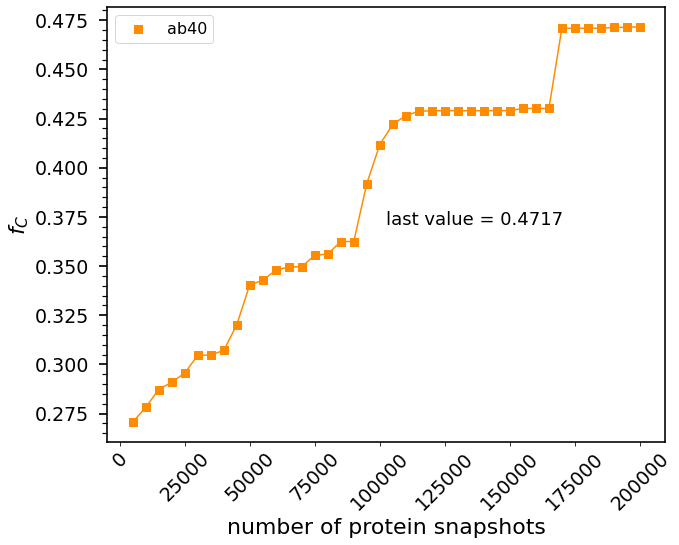

In [130]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='ab40' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.5,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.4f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.savefig('../supplemental_algorithm_figures/ab40_vary_protein_RSA_based.png', dpi = 1000, bbox_inches='tight')    


In [131]:
#after definition changed
protein_snaps=[]
fA_value_3rd_protein=[]

for every_ith_snap in range(5000,525000,5000):
    protein_snaps.append(salmon_rg_ree_ratheatmap['ratio'].values[:every_ith_snap].shape[0])
    fA_value_3rd_protein.append(RSA_based_fC(salmon_rg_ree_ratheatmap,
                                           'salmon','protein',salmon_moments,GW_moments_ind_runs_100_,
                                           24,every_ith_snap,1,0.1))



moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 G

400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of

100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapsh

600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 GW snapshots completed
300000 GW snapshots completed
400000 GW snapshots completed
500000 GW snapshots completed
600000 GW snapshots completed
700000 GW snapshots completed
moments_df and ratio_df must match in order of rows for protein/pei
100000 GW snapshots completed
200000 G

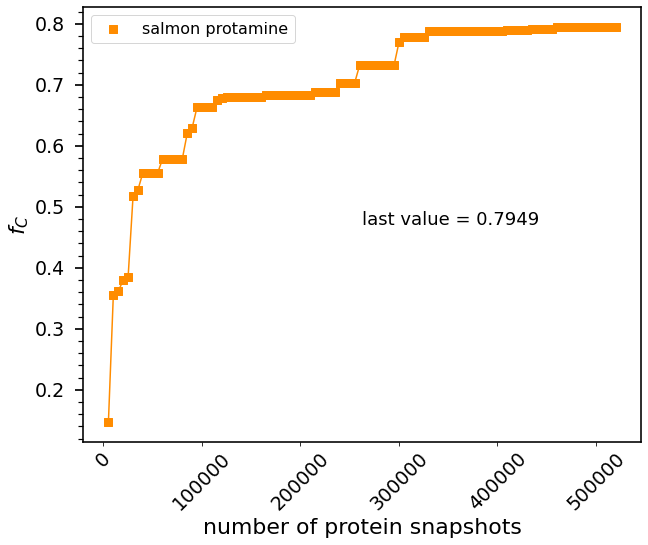

In [132]:




fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(protein_snaps,
           fA_value_3rd_protein,
           color='darkorange',label='salmon protamine' ,
           marker='s',s=80)

#popt, pcov = curve_fit(target_func, GW_snaps, fA_value_3rd,maxfev=2000,p0=[0.05,0.09,0.8])
ax.plot(protein_snaps,
       fA_value_3rd_protein,
       color='darkorange')
#x=GW_snaps#+[2000000,2500000,3000000,4000000]
#ax.plot(x, target_func(x, *popt), 'r-')
#del x
#plt.legend()


plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of protein snapshots',fontsize=22)
ax.set_ylabel('$f_C$',fontsize=22)
color_list = iter(cm.viridis(np.linspace(0, 1, GW_equil_chain_rg_ree.chain_length.unique().shape[0])))
#ax.axvline(x=720000,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='number of GW snapshots chosen')
ax.text(0.5,0.5,f'last value = {format(fA_value_3rd_protein[len(fA_value_3rd_protein)-1],"0.4f")}',
                 transform=ax.transAxes,fontsize=18,color='black')

#ax.set_ylim(-0.05,1)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(fontsize=16)
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.savefig('../supplemental_algorithm_figures/salmon_shortsims_vary_protein_RSA_based.png', dpi = 1000, bbox_inches='tight')    
